# Contexto

Opendata AIG Brazil

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).
Tabelas (arquivos)

    OCORRÊNCIA.csv - Informações sobre as ocorrências.
    OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
    AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
    FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
    RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.
    Fonte: Sistema DÉDALO.

- Fonte 	http://www.fab.mil.br/cenipa/
- Autor 	Centro de Investigação e Prevenção de Acidentes Aeronáuticos
- Última Atualização 	5 de Outubro de 2021, 19:19 (UTC-03:00)
- Cobertura geográfica 	Brasil
- Cobertura temporal 	2010 a 2019
- Frequência de atualização 	Anual
- Granularidade geográfica 	Aeródromo
- Granularidade temporal 	Hora:Minuto

Number of Rows: 14345
Number of Cols: 46

**40 Colunas Categoricas:**

- ocorrencia_classificacao                 category
- ocorrencia_latitude                      category
- ocorrencia_longitude                     category
- ocorrencia_cidade                        category
- ocorrencia_uf                            category
- ocorrencia_pais                          category
- ocorrencia_aerodromo                     category
- ocorrencia_hora                          category
- investigacao_aeronave_liberada           category
- investigacao_status                      category
- divulgacao_relatorio_publicado           category
- divulgacao_dia_publicacao                category
- ocorrencia_saida_pista                   category
- ocorrencia_tipo                          category
- ocorrencia_tipo_categoria                category
- taxonomia_tipo_icao                      category
- aeronave_matricula                       category
- aeronave_operador_categoria              category
- aeronave_tipo_veiculo                    category
- aeronave_fabricante                      category
- aeronave_modelo                          category
- aeronave_tipo_icao                       category
- aeronave_motor_tipo                      category
- aeronave_motor_quantidade                category
- aeronave_pais_fabricante                 category
- aeronave_pais_registro                   category
- aeronave_registro_categoria              category
- aeronave_registro_segmento               category
- aeronave_voo_origem                      category
- aeronave_voo_destino                     category
- aeronave_fase_operacao                   category
- aeronave_tipo_operacao                   category
- aeronave_nivel_dano                      category
- fator_nome                               category
- fator_aspecto                            category
- fator_condicionante                      category
- fator_area                               category
- recomendacao_conteudo                    category
- recomendacao_status                      category
- recomendacao_destinatario                category

**07 Colunas numéricas:**

- total_recomendacoes                         int32
- total_aeronaves_envolvidas                  int32
- aeronave_pmd                                int32
- aeronave_pmd_categoria                      int32
- aeronave_assentos                           int32
- aeronave_ano_fabricacao                   : Faz quantos anos que foi fabricado
- aeronave_fatalidades_total                  int32



**04 Colunas de data/hora:**
- ocorrencia_dia                     datetime64[ns]
- ocorrencia_hora                          category
- recomendacao_dia_assinatura                object
- recomendacao_dia_encaminhamento            object

## Tabela Relacionamento

<img src="http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png" width="700 px">

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import warnings
import math
import re

import missingno as msno

from matplotlib            import pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport

from IPython.display import display
pd.options.display.max_columns = None

from IPython.core.display  import HTML


import seaborn as sns

warnings.filterwarnings( 'ignore' )

In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

## 0.1. Helper Functions

In [2]:
def bar_plot_quantity_value_counts(data, y_, title):
    
    fig = plt.subplots(figsize = (15,4))
    sns.barplot(x= data.index.astype('object') , y = data[y_ ]);
    plt.title(title);
    
    return None
    

In [3]:
def pre_data_cleaning(df1):
    # Replace *** values for na
    df1.replace('***', np.nan, inplace= True)
    df1.replace('****', np.nan, inplace= True)
    df1.replace('*****', np.nan, inplace= True)
    df1.replace('*******', np.nan, inplace= True)
    df1.replace('*********', np.nan, inplace= True)
    
    # ocorrencia_latitude e longitude
    df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[***]',"",str(x)) )
    df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[***]',"",str(x)) )
    df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[°]',"",str(x)) )
    df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[°]',"",str(x)) )
    
    # aeronave_ano_fabricacao
    df1['aeronave_ano_fabricacao'].replace(0.0, 0, inplace = True)
    df1['aeronave_ano_fabricacao'].replace(9999.0, 0, inplace = True)
    
    df1['ocorrencia_latitude'].replace(',','.', inplace = True)
    df1['ocorrencia_latitude'].replace('- ','-', inplace = True)
    df1['ocorrencia_latitude'].replace(' ','', inplace = True)
    
    df1['ocorrencia_longitude'].replace(',','.', inplace = True)
    df1['ocorrencia_longitude'].replace('- ','-', inplace = True)
    df1['ocorrencia_longitude'].replace(' ','', inplace = True)
    
    
    
    
    # drop duplicated and identity codes columns 
    df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_pais'], axis=1, inplace=True)
    return df1
    
    

In [4]:
def load_data_site_merge():
    ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
    tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
    aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
    fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
    rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


    #merge
    aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
    aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
    aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
    df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )
    
    return df_raw


In [5]:
def load_data_raw_csv(csv):
    df_raw = pd.read_csv(csv)
    return df_raw



In [6]:
def change_dtype(df1):
    #mudar para datetime 
    df1['ocorrencia_dia'] = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')


    mask = '^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])$'

    # recomendacao_dia_encaminhamento - 0 se dia for data com má formato 

    df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
    df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


    #recomendacao_dia_feedback
    df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
    df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

    #recomendacao_dia_assinatura
    df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

    # convertendo os dados numéricos
    for c in df1.select_dtypes( include=['int64'] ):
        df1[c] = df1[c].astype('int32')

    df1['aeronave_assentos'].fillna(0, inplace=True )
    df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

    # convertendo os dados categóricos
    for c in df1.select_dtypes( include=['object'] ):
        df1[c] = df1[c].astype('category')
        
    return df1

In [7]:
def descriptive_analysis(df1):
    cat =df1.describe(include= 'category').T
    num = df1.describe().T
    
    return cat,num

In [298]:
def fill_na(df3):
    ## na for Most frequent
    #ocorrencia_uf - most frequent
    df3.ocorrencia_uf.fillna(df3.ocorrencia_uf.value_counts().index[0], inplace=True)

    #aeronave_matricula - most frequent
    df3.aeronave_matricula.fillna(df3.aeronave_matricula.value_counts().index[0], inplace=True)

    #df2.investigacao_status
    df3.investigacao_status.fillna(df3.investigacao_status.value_counts().index[0], inplace=True)

    # aeronave_tipo_veiculo
    df3.aeronave_tipo_veiculo.fillna(df3.aeronave_tipo_veiculo.value_counts().index[0], inplace=True)

    #aeronave_motor_tipo
    df3.aeronave_motor_tipo.fillna(df3.aeronave_motor_tipo.value_counts().index[0], inplace=True)

    # aeronave_motor_quantidade
    df3.aeronave_motor_quantidade.fillna(df3.aeronave_motor_quantidade.value_counts().index[0], inplace=True)

    #aeronave_registro_categoria
    df3.aeronave_registro_categoria.fillna(df3.aeronave_registro_categoria.value_counts().index[0], inplace = True)

    #aeronave_voo_origem e destino
    df3.aeronave_voo_origem.fillna(df3.aeronave_voo_origem.value_counts().index[0], inplace = True)
    df3.aeronave_voo_destino.fillna(df3.aeronave_voo_destino.value_counts().index[0], inplace = True)

    #aeronave_fase_operacao
    df3.aeronave_fase_operacao.fillna(df3.aeronave_fase_operacao.value_counts().index[0], inplace = True)

    #aeronave_nivel_dano 
    df3.aeronave_nivel_dano.fillna(df3.aeronave_nivel_dano .value_counts().index[0], inplace = True)

    ## drop na
    #aeronave_fabricante      ocorrencia_hora     
    df3.dropna(subset =['ocorrencia_hora', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_ano_fabricacao',  'aeronave_registro_segmento',  'aeronave_registro_categoria', 'aeronave_tipo_operacao'], inplace=True)

    #investigacao_aeronave_liberada - Suposições:
    ## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
    # NAO se divulgacao_relatorio_publicado == NAO 
    # os na´s que sobreram drop =647 
    df3.loc[ (df3['investigacao_aeronave_liberada'].isna()) & (df3['investigacao_status']== 'FINALIZADA') & (df3['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
    df3.loc[ ( df3['investigacao_aeronave_liberada'].isna() ) & ( df3.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
    df3.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


    # recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
    df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

    # para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
    #recomendacao_dia_encaminhamento    5698
    # não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
    df3.loc[df3['recomendacao_dia_encaminhamento'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0


    # set categoria
    df3['recomendacao_conteudo'] = df3['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

    # recomendacao_conteudo
    df3.loc[df1['recomendacao_conteudo'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
    # o restante vou dropar 
    df3.dropna(subset =['recomendacao_conteudo'], inplace=True)


    #set categoria
    df3['recomendacao_destinatario'] = df3['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
    # recomendacao_destinatario
    df3.loc[df3['recomendacao_destinatario'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

    # fill with 0 (so I can filter later)
    #set category
    df3['divulgacao_dia_publicacao'] = df3['divulgacao_dia_publicacao'].cat.add_categories(0)
    df3.divulgacao_dia_publicacao.fillna(0, inplace = True)
    
    #fator_condicionante
    df3.loc[( df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ASPECTO MÉDICO'), 'fator_condicionante' ]= 'INDIVIDUAL'
    df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL'), 'fator_condicionante'] = 'ORGANIZACIONAL'
    df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ERGONOMIA'), 'fator_condicionante'] = 'ORGANIZACIONAL'
    df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ASPECTO DE PROJETO'), 'fator_condicionante'] = 'ORGANIZACIONAL'
    
    
    df3['fator_condicionante'] = df3['fator_condicionante'].cat.add_categories('OUTRO')

    df3.loc[(df3['fator_condicionante'].isna() ) & (df3['fator_aspecto'] == 'OUTRO') & (df3['fator_area'] == 'OUTRO'), 'fator_condicionante']= 'OUTRO'
    df3.fator_condicionante.fillna(df3.fator_condicionante.value_counts().index[0], inplace = True)
     
    return df3

    

In [323]:
def feature_engineering(df4):
    # month
    df4['month'] = df4['ocorrencia_dia'].dt.month
    # day
    df4['day'] = df4['ocorrencia_dia'].dt.day
    # week of year
    df4['week_of_year'] = df4['ocorrencia_dia'].dt.weekofyear
    #0  monday  6 sunday
    df4['week_day'] = df4['ocorrencia_dia'].dt.weekday
    


    # divulgacao_dia_publicacao
    df4['divulgacao_dia_publicacao'] = pd.to_datetime(df4.divulgacao_dia_publicacao)

    df4['waiting_days_publish'] = ((df4['divulgacao_dia_publicacao'] - df4.ocorrencia_dia)).apply(lambda x:x.days ).astype(int)
    df4['waiting_days_publish'] = df4['waiting_days_publish'].apply( lambda x: 20000 if x < 0 else x)
    
    return df4

In [324]:
def databases_cleaned(df5): 

    #Excluindo as colunas duplicadas ou com muitos valores faltantes
    cols_drop = ['aeronave_operador_categoria', 'aeronave_pais_registro', 'ocorrencia_aerodromo','aeronave_pais_fabricante', 'recomendacao_dia_feedback', 'divulgacao_relatorio_numero', 'fator_nome', 'recomendacao_numero']
    df5.drop(cols_drop, axis=1, inplace=True)

    df_report_geo= df5[df5.waiting_days_publish != 20000][df5.ocorrencia_latitude !=0][df5.ocorrencia_latitude !='-0.0'][df5.ocorrencia_longitude != '0'][df5.ocorrencia_latitude != 'nan'][df5.ocorrencia_longitude != 'nan']
    df_report_geo.dropna(subset =['fator_aspecto', 'fator_condicionante','fator_area', 'recomendacao_status', 'recomendacao_destinatario_sigla' ], inplace=True)


    mask_geo = "(^-?\w+\.\w+)"

    df_report_geo['ocorrencia_latitude'] = df_report_geo['ocorrencia_latitude'].astype('object').apply( lambda x: float(re.search(mask_geo, x ).group(0))  if re.search(mask_geo, x ) else x )
    df_report_geo['ocorrencia_latitude'] = df_report_geo['ocorrencia_latitude'].astype('float32')
    df_report_geo['ocorrencia_longitude'] = df_report_geo['ocorrencia_longitude'].astype('object').apply( lambda x: float(re.search(mask_geo, x ).group(0))  if re.search(mask_geo, x ) else x )
    df_report_geo['ocorrencia_longitude'].replace('--49.0324242','-49.0324242', inplace = True)
    df_report_geo['ocorrencia_longitude'] = df_report_geo['ocorrencia_longitude'].astype('float32')

    df_all_onlyrecomendation = df5.copy()
    cols = ['ocorrencia_longitude', 'ocorrencia_latitude', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_dia_assinatura', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'waiting_days_publish', 'recomendacao_dia_encaminhamento' ]
    df_all_onlyrecomendation.drop(cols, axis=1, inplace=True)
    

    df_reports = df5[df5.waiting_days_publish != 20000][df5.recomendacao_dia_encaminhamento != 0][df5.ocorrencia_latitude != 'nan'][df5.ocorrencia_longitude != 'nan']
    df_reports.dropna(subset =['fator_aspecto', 'fator_area', 'recomendacao_status', 'recomendacao_destinatario_sigla'], inplace=True)
    
    return df_report_geo, df_all_onlyrecomendation, df_reports

In [242]:
def map_localization(df_report_geo):
    

    geo_report = df_report_geo[['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'aeronave_tipo_veiculo', 'aeronave_nivel_dano', 'fator_aspecto','fator_area', 'recomendacao_conteudo']].copy()

    geo_report['aeronave_nivel_dano'] = geo_report.aeronave_nivel_dano.apply(lambda x: 0 if x == "NENHUM" else 1 if x == 'LEVE' else 2 if x == 'DESTRUÍDA' else 4).astype('int32')
    fig = px.scatter_mapbox( geo_report, 
                             lat="ocorrencia_latitude", 
                             lon="ocorrencia_longitude", 
                             color="aeronave_tipo_veiculo", 
                             size="aeronave_nivel_dano",
                             color_continuous_scale=px.colors.cyclical.IceFire, 
                            center=dict(
                                lat=13.6558224,
                                lon=-69.7351902
                            ),
                             size_max=5, 
                             zoom=1 
                           )

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    
    return None

In [325]:
df_raw = load_data_raw_csv('./data/ocorrencias_aeronauticas_raw.csv')
df1 = pre_data_cleaning(df_raw)
df1 = change_dtype(df1)
cat, num = descriptive_analysis(df1)

df2 = fill_na(df1)

df3 = feature_engineering(df2)

In [326]:
df_report_geo, df_all_onlyrecomendation, df_reports = databases_cleaned(df3)

map_localization(df_report_geo)

In [40]:
df_all_onlyrecomendation.sample(2)

ocorrencia_classificacao ocorrencia_cidade ocorrencia_uf ocorrencia_dia  \
17189          INCIDENTE GRAVE         SÃO PAULO            SP     2020-12-03   
4716                 INCIDENTE          CURITIBA            PR     2011-06-21   

      ocorrencia_hora investigacao_aeronave_liberada investigacao_status  \
17189        14:42:00                            SIM               ATIVA   
4716         15:55:00                            NÃO          FINALIZADA   

      divulgacao_relatorio_publicado divulgacao_dia_publicacao  \
17189                            NÃO                1970-01-01   
4716                             NÃO                1970-01-01   

       total_recomendacoes  total_aeronaves_envolvidas ocorrencia_saida_pista  \
17189                    0                           2                    NÃO   
4716                     0                           1                    NÃO   

         ocorrencia_tipo                          ocorrencia_tipo_categoria  \
17189  INCURSÃO EM PISTA                                  INCURSÃO EM PISTA   
4716     ESTOURO DE PNEU  FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...   

      taxonomia_tipo_icao aeronave_matricula aeronave_tipo_veiculo  \
17189                  RI              PRGUD                 AVIÃO   
4716               SCF-NP              PTDYZ                 AVIÃO   

      aeronave_fabricante aeronave_modelo aeronave_tipo_icao  \
17189      BOEING COMPANY         737-8EH               B738   
4716       PIPER AIRCRAFT       PA-34-200               PA34   

      aeronave_motor_tipo aeronave_motor_quantidade  aeronave_pmd  \
17189                JATO                   BIMOTOR         70533   
4716               PISTÃO                   BIMOTOR          1814   

       aeronave_pmd_categoria  aeronave_assentos  aeronave_ano_fabricacao  \
17189                   70533                193                   2010.0   
4716                     1814                  6                   1972.0   

      aeronave_registro_categoria aeronave_registro_segmento  \
17189                       AVIÃO                    REGULAR   
4716                        AVIÃO                  INSTRUÇÃO   

      aeronave_voo_origem             aeronave_voo_destino  \
17189           CONGONHAS  DEPUTADO LUÍS EDUARDO MAGALHÃES   
4716    FORA DE AERODROMO                FORA DE AERODROMO   

      aeronave_fase_operacao aeronave_tipo_operacao aeronave_nivel_dano  \
17189              DECOLAGEM                REGULAR              NENHUM   
4716                    TÁXI              INSTRUÇÃO              NENHUM   

       aeronave_fatalidades_total         recomendacao_conteudo  \
17189                           0  NA - relatório Não publicado   
4716                            0  NA - relatório Não publicado   

          recomendacao_destinatario  month  day  week_of_year  
17189  NA - relatório Não publicado     12    3            49  
4716   NA - relatório Não publicado      6   21            25

In [31]:
 df_reports.sample(2)

ocorrencia_classificacao ocorrencia_latitude ocorrencia_longitude  \
14837                 ACIDENTE            -2.87889            -47.11556   
2097                  ACIDENTE      -22.9102777778       -43.1627777778   

      ocorrencia_cidade ocorrencia_uf ocorrencia_dia ocorrencia_hora  \
14837       PARAGOMINAS            PA     2018-05-03        11:40:00   
2097     RIO DE JANEIRO            RJ     2010-08-12        12:26:00   

      investigacao_aeronave_liberada investigacao_status  \
14837                            SIM          FINALIZADA   
2097                             SIM          FINALIZADA   

      divulgacao_relatorio_publicado divulgacao_dia_publicacao  \
14837                            SIM                2020-10-02   
2097                             SIM                2012-02-22   

       total_recomendacoes  total_aeronaves_envolvidas ocorrencia_saida_pista  \
14837                    1                           1                    NÃO   
2097                    19                           1                    SIM   

                 ocorrencia_tipo  ocorrencia_tipo_categoria  \
14837   PERDA DE CONTROLE EM VOO   PERDA DE CONTROLE EM VOO   
2097   PERDA DE CONTROLE NO SOLO  PERDA DE CONTROLE NO SOLO   

      taxonomia_tipo_icao aeronave_matricula aeronave_tipo_veiculo  \
14837               LOC-I              PTBYQ                 AVIÃO   
2097                LOC-G              PTLXO                 AVIÃO   

      aeronave_fabricante aeronave_modelo aeronave_tipo_icao  \
14837             EMBRAER         EMB-203               IPAN   
2097              LEARJET             55C               LJ55   

      aeronave_motor_tipo aeronave_motor_quantidade  aeronave_pmd  \
14837              PISTÃO                 MONOMOTOR          1900   
2097                 JATO                   BIMOTOR          9752   

       aeronave_pmd_categoria  aeronave_assentos  aeronave_ano_fabricacao  \
14837                    1900                  1                   2017.0   
2097                     9752                  9                   1988.0   

      aeronave_registro_categoria aeronave_registro_segmento  \
14837                       AVIÃO                 PARTICULAR   
2097                        AVIÃO                 TÁXI AÉREO   

      aeronave_voo_origem           aeronave_voo_destino  \
14837   FORA DE AERODROMO              FORA DE AERODROMO   
2097        SANTOS DUMONT  ANTONIO CARLOS JOBIM / GALEÃO   

      aeronave_fase_operacao aeronave_tipo_operacao aeronave_nivel_dano  \
14837                MANOBRA               AGRÍCOLA           DESTRUÍDA   
2097                  SUBIDA             TÁXI AÉREO         SUBSTANCIAL   

       aeronave_fatalidades_total             fator_aspecto  \
14837                           0  DESEMPENHO DO SER HUMANO   
2097                            0       ASPECTO PSICOLÓGICO   

        fator_condicionante         fator_area recomendacao_dia_assinatura  \
14837  OPERAÇÃO DA AERONAVE  FATOR OPERACIONAL         2020-10-02 00:00:00   
2097             INDIVIDUAL       FATOR HUMANO         2012-02-22 00:00:00   

      recomendacao_dia_encaminhamento  \
14837             2021-03-04 00:00:00   
2097              2012-02-22 00:00:00   

                                   recomendacao_conteudo  recomendacao_status  \
14837  Divulgar os ensinamentos colhidos na presente ...             CUMPRIDA   
2097   Proceder à revisão das atribuições do responsá...  AGUARDANDO RESPOSTA   

      recomendacao_destinatario_sigla          recomendacao_destinatario  \
14837                            ANAC  AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL   
2097                     OCEANAIR-TPX                OCEANAIR TÁXI AÉREO   

       month  day  week_of_year  waiting_days_publish  
14837      5    3            18                   883  
2097       8   12            32                   559

## 0.2. Loading data

In [7]:
ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


#merge
aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )



In [8]:
df_raw.sample(1)

codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
6898              65827               65827               65827   

      codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
6898               65827               65827                INCIDENTE   

     ocorrencia_latitude ocorrencia_longitude ocorrencia_cidade ocorrencia_uf  \
6898       -3.0388888889       -60.0461111111            MANAUS            AM   

     ocorrencia_pais ocorrencia_aerodromo ocorrencia_dia ocorrencia_hora  \
6898          BRASIL                 SBEG     14/10/2016        13:30:00   

     investigacao_aeronave_liberada investigacao_status  \
6898                            SIM          FINALIZADA   

     divulgacao_relatorio_numero divulgacao_relatorio_publicado  \
6898                         ***                            NÃO   

     divulgacao_dia_publicacao  total_recomendacoes  \
6898                       NaN                    0   

      total_aeronaves_envolvidas ocorrencia_saida_pista  \
6898                           1                    NÃO   

            ocorrencia_tipo  \
6898  FALHA DO MOTOR EM VOO   

                              ocorrencia_tipo_categoria taxonomia_tipo_icao  \
6898  FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...              SCF-PP   

     aeronave_matricula aeronave_operador_categoria aeronave_tipo_veiculo  \
6898              PRTTH                     REGULAR                 AVIÃO   

          aeronave_fabricante aeronave_modelo aeronave_tipo_icao  \
6898  AEROSPATIALE AND ALENIA      ATR-42-500               AT45   

     aeronave_motor_tipo aeronave_motor_quantidade  aeronave_pmd  \
6898          TURBOÉLICE                   BIMOTOR         18600   

      aeronave_pmd_categoria  aeronave_assentos  aeronave_ano_fabricacao  \
6898                   18600               52.0                   1996.0   

     aeronave_pais_fabricante aeronave_pais_registro  \
6898                   BRASIL                 BRASIL   

     aeronave_registro_categoria aeronave_registro_segmento  \
6898                       AVIÃO                    REGULAR   

     aeronave_voo_origem aeronave_voo_destino aeronave_fase_operacao  \
6898       EDUARDO GOMES        EDUARDO GOMES                 SUBIDA   

     aeronave_tipo_operacao aeronave_nivel_dano  aeronave_fatalidades_total  \
6898                REGULAR              NENHUM                           0   

     fator_nome fator_aspecto fator_condicionante fator_area  \
6898        NaN           NaN                 NaN        NaN   

     recomendacao_numero recomendacao_dia_assinatura  \
6898                 NaN                         NaN   

     recomendacao_dia_encaminhamento recomendacao_dia_feedback  \
6898                             NaN                       NaN   

     recomendacao_conteudo recomendacao_status  \
6898                   NaN                 NaN   

     recomendacao_destinatario_sigla recomendacao_destinatario  
6898                             NaN                       NaN

In [31]:
df_raw.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                17646 non-null  int64  
 1   codigo_ocorrencia1               17646 non-null  int64  
 2   codigo_ocorrencia2               17646 non-null  int64  
 3   codigo_ocorrencia3               17646 non-null  int64  
 4   codigo_ocorrencia4               17646 non-null  int64  
 5   ocorrencia_classificacao         17646 non-null  object 
 6   ocorrencia_latitude              16065 non-null  object 
 7   ocorrencia_longitude             16065 non-null  object 
 8   ocorrencia_cidade                17646 non-null  object 
 9   ocorrencia_uf                    17646 non-null  object 
 10  ocorrencia_pais                  17646 non-null  object 
 11  ocorrencia_aerodromo             17646 non-null  object 
 12  ocorrencia_dia    

In [9]:
#df_raw.to_csv('./data/ocorrencias_aeronauticas_raw.csv', index=False)

In [3]:
df_raw = pd.read_csv('./data/ocorrencias_aeronauticas_raw.csv')

In [4]:
with pd.option_context('display.max_rows', 10):
    print(df_raw)

       codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
0                  40211               40211               40211   
1                  40349               40349               40349   
2                  40351               40351               40351   
3                  39527               39527               39527   
4                  39527               39527               39527   
...                  ...                 ...                 ...   
17641              80245               80245               80245   
17642              80247               80247               80247   
17643              80251               80251               80251   
17644              80257               80257               80257   
17645              80259               80259               80259   

       codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
0                   40211               40211                INCIDENTE   
1                   40349          

# 1.0.  DESCRICAO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Summarization

### 1.2.1 Data Dimensions

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 59


In [6]:
# mean % of  nulls
df1.isna().mean()*100

codigo_ocorrencia                   0.000000
codigo_ocorrencia1                  0.000000
codigo_ocorrencia2                  0.000000
codigo_ocorrencia3                  0.000000
codigo_ocorrencia4                  0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 8.959538
ocorrencia_longitude                8.959538
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_pais                     0.000000
ocorrencia_aerodromo                0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     11.061997
investigacao_status                 2.006120
divulgacao_relatorio_numero         4.714950
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia

In [89]:
# description of numerical data , round(2)
df1.describe().round(2).T


count          mean           std      min  \
codigo_ocorrencia           17646.0  55161.196758  14019.913462  39115.0   
codigo_ocorrencia1          17646.0  55161.196758  14019.913462  39115.0   
codigo_ocorrencia2          17646.0  55161.196758  14019.913462  39115.0   
codigo_ocorrencia3          17646.0  55161.196758  14019.913462  39115.0   
codigo_ocorrencia4          17646.0  55161.196758  14019.913462  39115.0   
total_recomendacoes         17646.0      4.125921      5.555002      0.0   
total_aeronaves_envolvidas  17646.0      1.038196      0.194317      1.0   
aeronave_pmd                17646.0  12960.213930  35548.754335      0.0   
aeronave_pmd_categoria      17646.0  12960.213930  35548.754335      0.0   
aeronave_assentos           17646.0     21.513544     49.441564      0.0   
aeronave_ano_fabricacao     17414.0   1903.879637    409.513145      0.0   
aeronave_fatalidades_total  17646.0      0.989743      2.792484      0.0   

                                 25%      50%       75%       max  
codigo_ocorrencia           44606.75  49640.5  66430.75   80259.0  
codigo_ocorrencia1          44606.75  49640.5  66430.75   80259.0  
codigo_ocorrencia2          44606.75  49640.5  66430.75   80259.0  
codigo_ocorrencia3          44606.75  49640.5  66430.75   80259.0  
codigo_ocorrencia4          44606.75  49640.5  66430.75   80259.0  
total_recomendacoes             0.00      2.0      6.00      23.0  
total_aeronaves_envolvidas      1.00      1.0      1.00       3.0  
aeronave_pmd                 1315.00   2155.0   6033.00  396895.0  
aeronave_pmd_categoria       1315.00   2155.0   6033.00  396895.0  
aeronave_assentos               2.00      6.0      9.00     384.0  
aeronave_ano_fabricacao      1978.00   1992.0   2006.00    2020.0  
aeronave_fatalidades_total      0.00      0.0      0.00      16.0

In [90]:
# description for categorical data
df1.describe(include= 'category').T

count unique  \
ocorrencia_classificacao         17646      3   
ocorrencia_latitude              17646   2720   
ocorrencia_longitude             17646   2717   
ocorrencia_cidade                17646   1133   
ocorrencia_uf                    17642     27   
ocorrencia_pais                  17646      1   
ocorrencia_aerodromo              9663    529   
ocorrencia_hora                  17645    982   
investigacao_aeronave_liberada   12475      2   
investigacao_status              17292      2   
divulgacao_relatorio_numero      13600   1896   
divulgacao_relatorio_publicado   17646      2   
divulgacao_dia_publicacao        12906    217   
ocorrencia_saida_pista           17646      2   
ocorrencia_tipo                  17646     81   
ocorrencia_tipo_categoria        17646     81   
taxonomia_tipo_icao              17646     32   
aeronave_matricula               17632   4465   
aeronave_operador_categoria       3032     11   
aeronave_tipo_veiculo            17474      9   
aeronave_fabricante              17222    250   
aeronave_modelo                  17466    818   
aeronave_tipo_icao               17241    239   
aeronave_motor_tipo              17396      5   
aeronave_motor_quantidade        17544      5   
aeronave_pais_fabricante         17646     24   
aeronave_pais_registro           17646     24   
aeronave_registro_categoria      17474      9   
aeronave_registro_segmento       17376     12   
aeronave_voo_origem              17394    687   
aeronave_voo_destino             17440    693   
aeronave_fase_operacao           17620     31   
aeronave_tipo_operacao           17356      9   
aeronave_nivel_dano              17552      4   
fator_nome                       12465     73   
fator_aspecto                    12405     11   
fator_condicionante              11176      6   
fator_area                       12405      4   
recomendacao_numero              11400   1839   
recomendacao_conteudo            11399   1799   
recomendacao_status              11148      4   
recomendacao_destinatario_sigla  11400     85   
recomendacao_destinatario        11400     85   

                                                                               top  \
ocorrencia_classificacao                                                  ACIDENTE   
ocorrencia_latitude                                                            nan   
ocorrencia_longitude                                                           nan   
ocorrencia_cidade                                                   RIO DE JANEIRO   
ocorrencia_uf                                                                   SP   
ocorrencia_pais                                                             BRASIL   
ocorrencia_aerodromo                                                          SBRJ   
ocorrencia_hora                                                           12:26:00   
investigacao_aeronave_liberada                                                 SIM   
investigacao_status                                                     FINALIZADA   
divulgacao_relatorio_numero                                      A-001/CENIPA/2012   
divulgacao_relatorio_publicado                                                 SIM   
divulgacao_dia_publicacao                                               2012-02-22   
ocorrencia_saida_pista                                                         NÃO   
ocorrencia_tipo                                           PERDA DE CONTROLE EM VOO   
ocorrencia_tipo_categoria                                 PERDA DE CONTROLE EM VOO   
taxonomia_tipo_icao                                                         SCF-NP   
aeronave_matricula                                                           PTLXO   
aeronave_operador_categoria                                                REGULAR   
aeronave_tipo_veiculo                                                        AVIÃO   
aeronave_fabricante                                                CES

### 1.2.3  Pre data cleaning

In [7]:
# Replace *** values for na
df1.replace('***', np.nan, inplace= True)
df1.replace('****', np.nan, inplace= True)
df1.replace('*****', np.nan, inplace= True)
df1.replace('*******', np.nan, inplace= True)
df1.replace('*********', np.nan, inplace= True)


In [9]:
# ocorrencia_latitude e longitude

df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[°]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[°]',"",str(x)) )

In [10]:
# aeronave_ano_fabricacao
df1['aeronave_ano_fabricacao'].replace(0.0, 0, inplace = True)
df1['aeronave_ano_fabricacao'].replace(9999.0, 0, inplace = True)





In [12]:
# drop duplicated and identity codes columns 
df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_pais'], axis=1, inplace=True)

In [177]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 53


In [96]:
# description for categorical data
df1.describe(include= object).T

count unique  \
ocorrencia_classificacao         17646      3   
ocorrencia_latitude              17646   2720   
ocorrencia_longitude             17646   2717   
ocorrencia_cidade                17646   1133   
ocorrencia_uf                    17642     27   
ocorrencia_aerodromo              9663    529   
ocorrencia_dia                   17646   3155   
ocorrencia_hora                  17645    982   
investigacao_aeronave_liberada   12475      2   
investigacao_status              17292      2   
divulgacao_relatorio_numero      13600   1896   
divulgacao_relatorio_publicado   17646      2   
divulgacao_dia_publicacao        12906    217   
ocorrencia_saida_pista           17646      2   
ocorrencia_tipo                  17646     81   
ocorrencia_tipo_categoria        17646     81   
taxonomia_tipo_icao              17646     32   
aeronave_matricula               17632   4465   
aeronave_operador_categoria       3032     11   
aeronave_tipo_veiculo            17474      9   
aeronave_fabricante              17222    250   
aeronave_modelo                  17466    818   
aeronave_tipo_icao               17241    239   
aeronave_motor_tipo              17396      5   
aeronave_motor_quantidade        17544      5   
aeronave_pais_fabricante         17646     24   
aeronave_pais_registro           17646     24   
aeronave_registro_categoria      17474      9   
aeronave_registro_segmento       17376     12   
aeronave_voo_origem              17394    687   
aeronave_voo_destino             17440    693   
aeronave_fase_operacao           17620     31   
aeronave_tipo_operacao           17356      9   
aeronave_nivel_dano              17552      4   
fator_nome                       12465     73   
fator_aspecto                    12405     11   
fator_condicionante              11176      6   
fator_area                       12405      4   
recomendacao_numero              11400   1839   
recomendacao_dia_assinatura      11400    206   
recomendacao_dia_encaminhamento  11400    204   
recomendacao_dia_feedback         7293    379   
recomendacao_conteudo            11399   1799   
recomendacao_status              11148      4   
recomendacao_destinatario_sigla  11400     85   
recomendacao_destinatario        11400     85   

                                                                               top  \
ocorrencia_classificacao                                                  ACIDENTE   
ocorrencia_latitude                                                            nan   
ocorrencia_longitude                                                           nan   
ocorrencia_cidade                                                   RIO DE JANEIRO   
ocorrencia_uf                                                                   SP   
ocorrencia_aerodromo                                                          SBRJ   
ocorrencia_dia                                                          12/08/2010   
ocorrencia_hora                                                           12:26:00   
investigacao_aeronave_liberada                                                 SIM   
investigacao_status                                                     FINALIZADA   
divulgacao_relatorio_numero                                      A-001/CENIPA/2012   
divulgacao_relatorio_publicado                                                 SIM   
divulgacao_dia_publicacao                                               2012-02-22   
ocorrencia_saida_pista                                                         NÃO   
ocorrencia_tipo                                           PERDA DE CONTROLE EM VOO   
ocorrencia_tipo_categoria                                 PERDA DE CONTROLE EM VOO   
taxonomia_tipo_icao                                                         SCF-NP   
aeronave_matricula                                                           PTLXO   
aeronave_operador_categoria                                                REGULAR   
aeronave_

In [178]:
# mean % of  nulls
df1.isna().mean()*100

ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia_tipo                     0.000000
ocorrencia_tipo_categoria           0.000000
taxonomia_tipo_icao                 0.000000
aeronave_matricula                  0.079338
aeronave_operador_categoria        82.817636
aeronave_tipo_veiculo               0.974725
aeronave_f

## 1.2. Data Types

### Alterando os tipos dos dados para facilitar a manipulação de dados e reduzir o uso de recursos computacionais

In [45]:
#mudar para datetime 
df1['ocorrencia_dia'] = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')


mask = '^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])$'

# recomendacao_dia_encaminhamento - 0 se dia for data com má formato 

df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


#recomendacao_dia_feedback
df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

#recomendacao_dia_assinatura
df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

In [46]:
# convertendo os dados numéricos
for c in df1.select_dtypes( include=['int64'] ):
    df1[c] = df1[c].astype('int32')
    


In [47]:
# 35  aeronave_assentos                17646 non-null  int32  
# aeronave_assentos - 0 para na - lidarei com os na mais tarde
df1['aeronave_assentos'].fillna(0, inplace=True )
df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

# convertendo os dados categóricos
for c in df1.select_dtypes( include=['object'] ):
    df1[c] = df1[c].astype('category')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   codigo_ocorrencia                17646 non-null  int32         
 1   codigo_ocorrencia1               17646 non-null  int32         
 2   codigo_ocorrencia2               17646 non-null  int32         
 3   codigo_ocorrencia3               17646 non-null  int32         
 4   codigo_ocorrencia4               17646 non-null  int32         
 5   ocorrencia_classificacao         17646 non-null  category      
 6   ocorrencia_latitude              17646 non-null  category      
 7   ocorrencia_longitude             17646 non-null  category      
 8   ocorrencia_cidade                17646 non-null  category      
 9   ocorrencia_uf                    17642 non-null  category      
 10  ocorrencia_pais                  17646 non-null  category 

# 2. Brief Understanding  of the data  

In [183]:
df2 = df1.copy()

In [367]:
## PROFILE  

#profile = ProfileReport( df2 )
#profile.to_file( 'profile_v2.html' )

Summarize dataset:   0%|          | 0/66 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [467]:
#for coluna in df1.columns:
#    print(coluna.upper())
#    grafico = px.histogram(df1, x=coluna, color="ocorrencia_classificacao");
#    grafico.show()

# 3. Data Preprocessing

In [97]:
df3 = df2.copy()

## 3.1. Check NA

In [92]:
df3.isna().mean()*100

codigo_ocorrencia                   0.000000
codigo_ocorrencia1                  0.000000
codigo_ocorrencia2                  0.000000
codigo_ocorrencia3                  0.000000
codigo_ocorrencia4                  0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_pais                     0.000000
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia

### 3.2  Fill Out NA

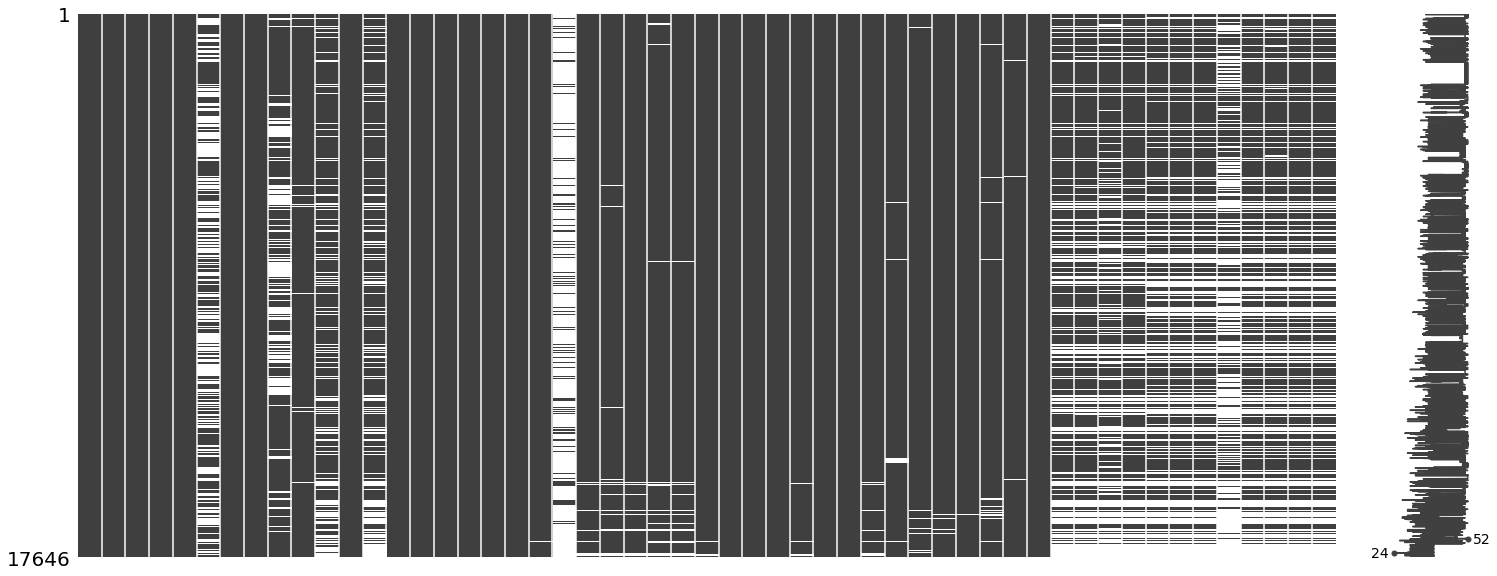

In [297]:
msno.matrix(df3)
plt.show()

strategy adopted:
- analyze the division of values ​​within the features and the percentage of nulls
- if the division within the feature is large between one class and another and the % of nulls is small, I add the nulls to the most frequent feature
- if there is an impact when aggregating nulls to some feature class, drop na´s 
- features occurrence_latitude and longitude NA´s  represent an average of 15%

In [98]:
## na for Most frequent
#ocorrencia_uf - most frequent
df3.ocorrencia_uf.fillna(df3.ocorrencia_uf.value_counts().index[0], inplace=True)

#aeronave_matricula - most frequent
df3.aeronave_matricula.fillna(df3.aeronave_matricula.value_counts().index[0], inplace=True)

#df2.investigacao_status
df3.investigacao_status.fillna(df3.investigacao_status.value_counts().index[0], inplace=True)

# aeronave_tipo_veiculo
df3.aeronave_tipo_veiculo.fillna(df3.aeronave_tipo_veiculo.value_counts().index[0], inplace=True)

#aeronave_motor_tipo
df3.aeronave_motor_tipo.fillna(df3.aeronave_motor_tipo.value_counts().index[0], inplace=True)

# aeronave_motor_quantidade
df3.aeronave_motor_quantidade.fillna(df3.aeronave_motor_quantidade.value_counts().index[0], inplace=True)

#aeronave_registro_categoria
df3.aeronave_registro_categoria.fillna(df3.aeronave_registro_categoria.value_counts().index[0], inplace = True)

#aeronave_voo_origem e destino
df3.aeronave_voo_origem.fillna(df3.aeronave_voo_origem.value_counts().index[0], inplace = True)
df3.aeronave_voo_destino.fillna(df3.aeronave_voo_destino.value_counts().index[0], inplace = True)

#aeronave_fase_operacao
df3.aeronave_fase_operacao.fillna(df3.aeronave_fase_operacao.value_counts().index[0], inplace = True)

#aeronave_nivel_dano 
df3.aeronave_nivel_dano.fillna(df3.aeronave_nivel_dano .value_counts().index[0], inplace = True)

## drop na
#aeronave_fabricante      ocorrencia_hora     
df3.dropna(subset =['ocorrencia_hora', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_ano_fabricacao',  'aeronave_registro_segmento',  'aeronave_registro_categoria', 'aeronave_tipo_operacao'], inplace=True)



In [99]:
#investigacao_aeronave_liberada - Suposições:
## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
# NAO se divulgacao_relatorio_publicado == NAO 
# os na´s que sobreram drop =647 
df3.loc[ (df3['investigacao_aeronave_liberada'].isna()) & (df3['investigacao_status']== 'FINALIZADA') & (df3['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
df3.loc[ ( df3['investigacao_aeronave_liberada'].isna() ) & ( df3.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
df3.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


# recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

# para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
#recomendacao_dia_encaminhamento    5698
# não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
df3.loc[df3['recomendacao_dia_encaminhamento'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0


# set categoria
df3['recomendacao_conteudo'] = df3['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

# recomendacao_conteudo
df3.loc[df1['recomendacao_conteudo'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
# o restante vou dropar 
df3.dropna(subset =['recomendacao_conteudo'], inplace=True)


#set categoria
df3['recomendacao_destinatario'] = df3['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
# recomendacao_destinatario
df3.loc[df3['recomendacao_destinatario'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

# fill with 0 (so I can filter later)
#set category
df3['divulgacao_dia_publicacao'] = df3['divulgacao_dia_publicacao'].cat.add_categories(0)
df3.divulgacao_dia_publicacao.fillna(0, inplace = True)

#fator_condicionante
df3.loc[( df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ASPECTO MÉDICO') , 'fator_condicionate']= 'INDIVIDUAL'
df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL'), 'fator_condicionante'] = 'ORGANIZACIONAL'
df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ERGONOMIA'), 'fator_condicionante'] = 'ORGANIZACIONAL'
df3.loc[(df3['fator_condicionante'].isna()) & (df3['fator_aspecto'] == 'ASPECTO DE PROJETO'), 'fator_condicionante'] = 'ORGANIZACIONAL'
df3.fator_condicionante.fillna(df3.fator_condicionante.value_counts().index[0], inplace = True)


In [240]:
#set category
df3['fator_condicionante'] = df3['fator_condicionante'].cat.add_categories('OUTRO')

df3.loc[(df3['fator_condicionante'].isna() ) & (df3['fator_aspecto'] == 'OUTRO') & df3['fator_area'] == 'OUTRO', 'fator_condicionante']= 'OUTRO'

ValueError: new categories must not include old categories: {'OUTRO'}

In [316]:
#df3.to_csv('./data/ocorrencias_aeronauticas_cleaned_ok.csv', index=False)

# 4. Feature Engineering

In [107]:
df4 = df3

In [108]:
print( 'Number of Rows: {}'.format( df4.shape[0] ) )
print( 'Number of Cols: {}'.format( df4.shape[1] ) )

Number of Rows: 14309
Number of Cols: 53


In [323]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14309 entries, 0 to 17644
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ocorrencia_classificacao         14309 non-null  category      
 1   ocorrencia_latitude              14309 non-null  category      
 2   ocorrencia_longitude             14309 non-null  category      
 3   ocorrencia_cidade                14309 non-null  category      
 4   ocorrencia_uf                    14309 non-null  category      
 5   ocorrencia_dia                   14309 non-null  datetime64[ns]
 6   ocorrencia_hora                  14309 non-null  category      
 7   investigacao_aeronave_liberada   14309 non-null  category      
 8   investigacao_status              14309 non-null  category      
 9   divulgacao_relatorio_publicado   14309 non-null  category      
 10  divulgacao_dia_publicacao        14309 non-null  category 

## 4.1 Criacao das Hipoteses

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao

**Fator Humano** 
- Anos de Experiência dos pilotos influencia na gravidade do acidente?
- Treinamento constante (mínimo 2 x ano) inibem ocorrencias?
- Fator humano é a causa principal das ocorrencias?

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operacao

**Peças**
- quais as peças que dão mais acidente
- Peso do avião (excesso ou falta de carga)?
- Excesso de carga ?
- Origem das peças usadas na manutenção.

**Ambiente**
- Temperatura
- Humindade do ar
- Velocidade do vento

- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora


### 4.1.1 Seleção Hipoteses

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operaca

**Ambiente/Região" 
- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora

**Fator Humano** 
- Fator humano é a causa principal das ocorrencias?

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao



## 4.2 Feature Engeneering

In [109]:
# month
df4['month'] = df4['ocorrencia_dia'].dt.month
# day
df4['day'] = df4['ocorrencia_dia'].dt.day
# week of year
df4['week_of_year'] = df4['ocorrencia_dia'].dt.weekofyear
df4['week_day'] = df4['ocorrencia_dia'].dt.weekday



# divulgacao_dia_publicacao
df4['divulgacao_dia_publicacao'] = pd.to_datetime(df4.divulgacao_dia_publicacao)

df4['waiting_days_publish'] = ((df4['divulgacao_dia_publicacao'] - df4.ocorrencia_dia)).apply(lambda x:x.days ).astype(int)
df4['waiting_days_publish'] = df4['waiting_days_publish'].apply( lambda x: 20000 if x < 0 else x)

In [112]:
df4.sample(3)

ocorrencia_classificacao ocorrencia_latitude ocorrencia_longitude  \
11615                 ACIDENTE             -3.7325       -38.7119444444   
9418                  ACIDENTE       -5.0605555556       -42.8244444444   
3798                  ACIDENTE      -28.4605555556       -53.5766666667   

      ocorrencia_cidade ocorrencia_uf ocorrencia_aerodromo ocorrencia_dia  \
11615           CAUCAIA            CE                  NaN     2015-06-26   
9418           TERESINA            PI                 SBTE     2013-12-16   
3798           PEJUÇARA            RS                  NaN     2011-02-15   

      ocorrencia_hora investigacao_aeronave_liberada investigacao_status  \
11615        19:38:00                            SIM          FINALIZADA   
9418         21:48:00                            SIM          FINALIZADA   
3798         13:10:00                            SIM          FINALIZADA   

      divulgacao_relatorio_numero divulgacao_relatorio_publicado  \
11615           A-092/CENIPA/2015                            SIM   
9418            A-223/CENIPA/2013                            SIM   
3798            A-050/CENIPA/2012                            SIM   

      divulgacao_dia_publicacao  total_recomendacoes  \
11615                2017-02-08                    8   
9418                 2016-02-29                    6   
3798                 2012-07-02                    5   

       total_aeronaves_envolvidas ocorrencia_saida_pista  \
11615                           1                    NÃO   
9418                            1                    NÃO   
3798                            1                    NÃO   

                 ocorrencia_tipo  \
11615                     OUTROS   
9418       FALHA DO MOTOR EM VOO   
3798   OPERAÇÃO A BAIXA ALTITUDE   

                               ocorrencia_tipo_categoria taxonomia_tipo_icao  \
11615                                             OUTROS                OTHR   
9418   FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...              SCF-PP   
3798                           OPERAÇÃO A BAIXA ALTITUDE                LALT   

      aeronave_matricula aeronave_operador_categoria aeronave_tipo_veiculo  \
11615              PREES                         NaN           HELICÓPTERO   
9418               PTCNL                         NaN                 AVIÃO   
3798               PRAAK                         NaN                 AVIÃO   

          aeronave_fabricante aeronave_modelo aeronave_tipo_icao  \
11615  EUROCOPTER DEUTSCHLAND       BK117 C-2               EC45   
9418          CESSNA AIRCRAFT            172A               C172   
3798          CESSNA AIRCRAFT           A188B               C188   

      aeronave_motor_tipo aeronave_motor_quantidade  aeronave_pmd  \
11615           TURBOEIXO                   BIMOTOR          3585   
9418               PISTÃO                 MONOMOTOR           998   
3798               PISTÃO                 MONOMOTOR          1497   

       aeronave_pmd_categoria  aeronave_assentos  aeronave_ano_fabricacao  \
11615                    3585                  9                   2013.0   
9418                      998                  4                   1960.0   
3798                     1497                  1                   1977.0   

      aeronave_pais_fabricante aeronave_pais_registro  \
11615                   BRASIL                 BRASIL   
9418                    BRASIL                 BRASIL   
3798                    BRASIL                 BRASIL   

      aeronave_registro_categoria aeronave_registro_segmento  \
11615                 HELICÓPTERO       ADMINISTRAÇÃO DIRETA   
9418                        AVIÃO                  INSTRUÇÃO   
3798                        AVIÃO                   AGRÍCOLA   

             aeronave_voo_origem       aeronave_voo_destino  \
11615              PINTO MARTINS          FORA DE AERODROMO   
9418   SENADOR PETRÔNIO PORTELLA  SENADOR PETRÔNIO PORTELLA   
3798           FORA DE AERODROMO       

# 5. Filtragem de Variáveis

In [193]:
df5 = df4.copy()

In [15]:
df5.sample(3)

ocorrencia_classificacao ocorrencia_latitude ocorrencia_longitude  \
17457                INCIDENTE          -15.876944           -47.916389   
10494                 ACIDENTE      -23.9597222222       -46.3269444444   
737                   ACIDENTE      -22.4761111111       -44.4711111111   

      ocorrencia_cidade ocorrencia_uf ocorrencia_aerodromo ocorrencia_dia  \
17457          BRASÍLIA            DF                 SBBR     2021-04-20   
10494            SANTOS            SP                  NaN     2014-08-13   
737             RESENDE            RJ                  NaN     2010-04-27   

      ocorrencia_hora investigacao_aeronave_liberada investigacao_status  \
17457        10:56:00                            SIM          FINALIZADA   
10494        13:03:00                            SIM          FINALIZADA   
737          18:47:00                            SIM          FINALIZADA   

      divulgacao_relatorio_numero divulgacao_relatorio_publicado  \
17457                         NaN                            NÃO   
10494           A-134/CENIPA/2014                            SIM   
737             A-114/CENIPA/2012                            SIM   

      divulgacao_dia_publicacao  total_recomendacoes  \
17457                1970-01-01                    0   
10494                2016-01-11                   13   
737                  2012-10-17                    8   

       total_aeronaves_envolvidas ocorrencia_saida_pista  \
17457                           1                    NÃO   
10494                           1                    NÃO   
737                             1                    NÃO   

                ocorrencia_tipo  \
17457         COM TREM DE POUSO   
10494  PERDA DE CONTROLE EM VOO   
737    PERDA DE CONTROLE EM VOO   

                               ocorrencia_tipo_categoria taxonomia_tipo_icao  \
17457  FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...              SCF-NP   
10494                           PERDA DE CONTROLE EM VOO               LOC-I   
737                             PERDA DE CONTROLE EM VOO               LOC-I   

      aeronave_matricula aeronave_operador_categoria aeronave_tipo_veiculo  \
17457              PTMEH                         NaN                 AVIÃO   
10494              PRAFA                         NaN                 AVIÃO   
737                PREBM                         NaN                 AVIÃO   

      aeronave_fabricante aeronave_modelo aeronave_tipo_icao  \
17457     CESSNA AIRCRAFT            208B               C208   
10494     CESSNA AIRCRAFT         560XLS+               C56X   
737           AIR TRACTOR          AT-802               AT8T   

      aeronave_motor_tipo aeronave_motor_quantidade  aeronave_pmd  \
17457          TURBOÉLICE                 MONOMOTOR          3969   
10494                JATO                   BIMOTOR          9163   
737            TURBOÉLICE                 MONOMOTOR          7258   

       aeronave_pmd_categoria  aeronave_assentos  aeronave_ano_fabricacao  \
17457                    3969                 11                   1993.0   
10494                    9163                 14                   2010.0   
737                      7258                  2                   2003.0   

      aeronave_pais_fabricante aeronave_pais_registro  \
17457                   BRASIL                 BRASIL   
10494                   BRASIL                 BRASIL   
737                     BRASIL                 BRASIL   

      aeronave_registro_categoria aeronave_registro_segmento  \
17457                       AVIÃO                 TÁXI AÉREO   
10494                       AVIÃO                 PARTICULAR   
737                         AVIÃO       ADMINISTRAÇÃO DIRETA   

                   aeronave_voo_origem  aeronave_voo_destino  \
17457  PRESIDENTE JUSCELINO KUBITSCHEK          RONDONÓPOLIS   
10494                    SANTOS DUMONT  BASE AÉREA DE SANTOS   
737                            RESENDE     FORA DE AEROD

### 5.2 Column Filtering

In [16]:
#Excluindo as colunas duplicadas ou com muitos valores faltantes
cols_drop = ['aeronave_operador_categoria', 'aeronave_pais_registro', 'ocorrencia_aerodromo','aeronave_pais_fabricante', 'recomendacao_dia_feedback', 'divulgacao_relatorio_numero', 'fator_nome', 'recomendacao_numero']
df5.drop(cols_drop, axis=1, inplace=True)

### 5.1 Row Filtering

In [17]:
df_report_geo= df5[df5.waiting_days_publish != 20000][df5.ocorrencia_latitude !=0][df5.ocorrencia_latitude !='-0.0'][df5.ocorrencia_longitude != '0'][df5.ocorrencia_latitude != 'nan'][df5.ocorrencia_longitude != 'nan']
df_report_geo.dropna(subset =['fator_aspecto', 'fator_condicionante','fator_area', 'recomendacao_status', 'recomendacao_destinatario_sigla' ], inplace=True)


mask_geo = "(^-?\w+\.\w+)"

df_report_geo['ocorrencia_latitude'] = df_report_geo['ocorrencia_latitude'].astype('object').apply( lambda x: float(re.search(mask_geo, x ).group(0))  if re.search(mask_geo, x ) else x )
df_report_geo['ocorrencia_latitude'] = df_report_geo['ocorrencia_latitude'].astype('float32')
df_report_geo['ocorrencia_longitude'] = df_report_geo['ocorrencia_longitude'].astype('object').apply( lambda x: float(re.search(mask_geo, x ).group(0))  if re.search(mask_geo, x ) else x )
df_report_geo['ocorrencia_longitude'].replace('--49.0324242','-49.0324242', inplace = True)
df_report_geo['ocorrencia_longitude'] = df_report_geo['ocorrencia_longitude'].astype('float32')

In [18]:
# map

map_localization(df_report_geo)


In [21]:
df_all_onlyrecomendation = df5.copy()
cols = ['ocorrencia_longitude', 'ocorrencia_latitude', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_dia_assinatura', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'waiting_days_publish', 'recomendacao_dia_encaminhamento' ]
df_all_onlyrecomendation.drop(cols, axis=1, inplace=True)
df_all_onlyrecomendation.sample(5)

ocorrencia_classificacao ocorrencia_cidade ocorrencia_uf ocorrencia_dia  \
8208                 INCIDENTE      CAMPO GRANDE            MS     2013-03-11   
131                   ACIDENTE         SÃO PAULO            SP     2010-01-10   
8803                 INCIDENTE     FLORIANÓPOLIS            SC     2013-07-28   
17457                INCIDENTE          BRASÍLIA            DF     2021-04-20   
1409                 INCIDENTE            OLINDA            PE     2010-07-11   

      ocorrencia_hora investigacao_aeronave_liberada investigacao_status  \
8208         16:49:00                            NÃO          FINALIZADA   
131          14:50:00                            SIM          FINALIZADA   
8803         17:00:00                            NÃO          FINALIZADA   
17457        10:56:00                            SIM          FINALIZADA   
1409         11:50:00                            SIM          FINALIZADA   

      divulgacao_relatorio_publicado divulgacao_dia_publicacao  \
8208                             NÃO                1970-01-01   
131                              SIM                2012-11-19   
8803                             NÃO                1970-01-01   
17457                            NÃO                1970-01-01   
1409                             SIM                2011-07-21   

       total_recomendacoes  total_aeronaves_envolvidas ocorrencia_saida_pista  \
8208                     0                           1                    NÃO   
131                      8                           1                    NÃO   
8803                     0                           1                    NÃO   
17457                    0                           1                    NÃO   
1409                     8                           1                    NÃO   

                                         ocorrencia_tipo  \
8208                                     ESTOURO DE PNEU   
131                            PERDA DE CONTROLE NO SOLO   
8803                                     ESTOURO DE PNEU   
17457                                  COM TREM DE POUSO   
1409   COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO   

                               ocorrencia_tipo_categoria taxonomia_tipo_icao  \
8208   FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...              SCF-NP   
131                            PERDA DE CONTROLE NO SOLO               LOC-G   
8803   FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...              SCF-NP   
17457  FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...              SCF-NP   
1409   COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                CTOL   

      aeronave_matricula aeronave_tipo_veiculo  aeronave_fabricante  \
8208               PTZKH                 AVIÃO  KALIL MOHAMAD AWADA   
131                PPMAW           HELICÓPTERO             HELIBRAS   
8803               PRFLN                 AVIÃO      CESSNA AIRCRAFT   
17457              PTMEH                 AVIÃO      CESSNA AIRCRAFT   
1409               PTYZK           HELICÓPTERO      BELL HELICOPTER   

      aeronave_modelo aeronave_tipo_icao aeronave_motor_tipo  \
8208            RV-10               ZZZZ              PISTÃO   
131         AS 350 B3               AS50           TURBOEIXO   
8803              152               C152              PISTÃO   
17457            208B               C208          TURBOÉLICE   
1409              407               B407           TURBOEIXO   

      aeronave_motor_quantidade  aeronave_pmd  aeronave_pmd_categoria  \
8208                  MONOMOTOR          1225                    1225   
131                   MONOMOTOR          2250                    2250   
8803                  MONOMOTOR           757                     757   
17457                 MONOMOTOR          3969                    3969   
1409                  MONOMOTOR          2268                    2268   

       aeronave_assentos  aeronave_ano_fabricacao aeronave_registro_categoria  \
8208

In [251]:
df_reports = df5[df5.waiting_days_publish != 20000][df5.recomendacao_dia_encaminhamento != 0] [df5.ocorrencia_latitude != 'nan'][df5.ocorrencia_longitude != 'nan']
df_reports.dropna(subset =['fator_aspecto', 'fator_area', 'recomendacao_status', 'recomendacao_destinatario_sigla'], inplace=True)

In [277]:
df_reports.loc[( df_reports['fator_condicionante'].isna()) & (df_reports['fator_aspecto'] == 'ASPECTO MÉDICO'), 'fator_condicionante' ]= 'INDIVIDUAL'

In [279]:
df_reports.loc[(df_reports['fator_condicionante'].isna()) & (df_reports['fator_aspecto'] == 'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL'), 'fator_condicionante'] = 'ORGANIZACIONAL'

In [281]:
df_reports.loc[(df_reports['fator_condicionante'].isna()) & (df_reports['fator_aspecto'] == 'ERGONOMIA'), 'fator_condicionante'] = 'ORGANIZACIONAL'

In [286]:
df_reports.loc[(df_reports['fator_condicionante'].isna()) & (df_reports['fator_aspecto'] == 'ASPECTO DE PROJETO'), 'fator_condicionante'] = 'ORGANIZACIONAL'

# 6.0 ANALISE EXPLORATORIA DOS DADOS EDA

#### Nr of seats

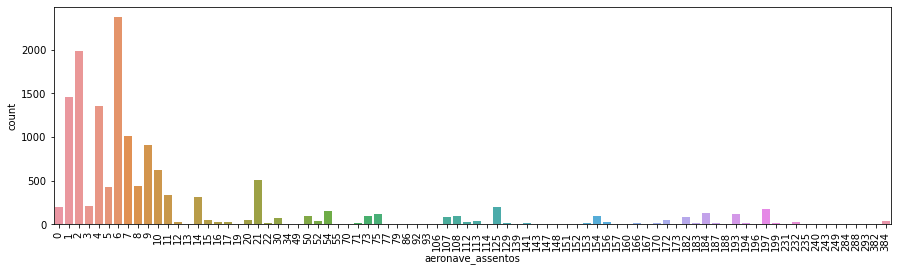

In [41]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_assentos', data = df_all_onlyrecomendation );
plt.xticks(rotation=90);


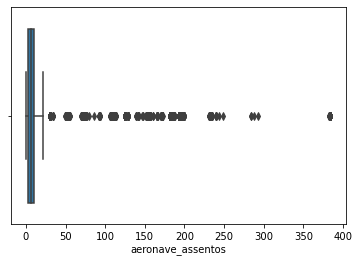

In [42]:
sns.boxplot(df_all_onlyrecomendation.aeronave_assentos);


#### Ano de Fabricação X Fabricante

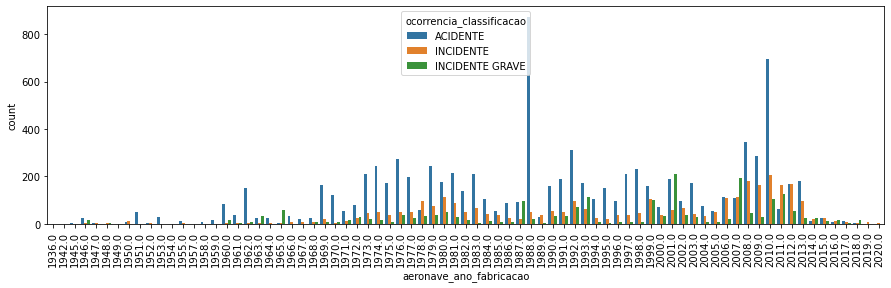

In [43]:
sub_year = df_all_onlyrecomendation[df_all_onlyrecomendation.aeronave_ano_fabricacao != 0 ]
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_ano_fabricacao', hue='ocorrencia_classificacao' ,data = sub_year);
plt.xticks(rotation=90);

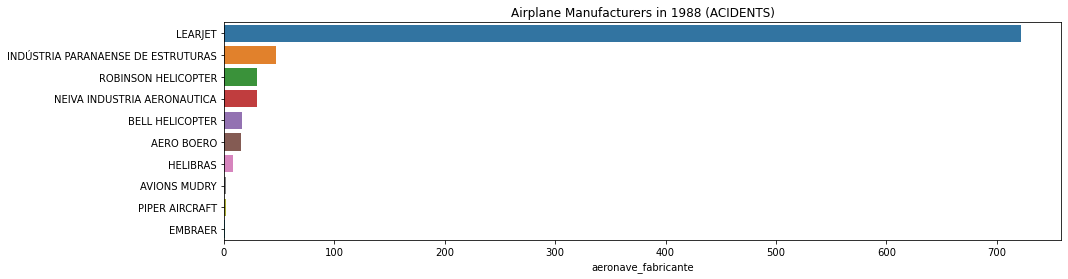

In [45]:
# in 1988 who has the manufacturer
fabricante_1988 = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ('ACIDENTE' )][df_all_onlyrecomendation.aeronave_ano_fabricacao == 1988]['aeronave_fabricante'].value_counts()[0:10].to_frame()
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_1988.aeronave_fabricante, y =fabricante_1988.index.astype('object') );
plt.title("Airplane Manufacturers in 1988 (ACIDENTS)");

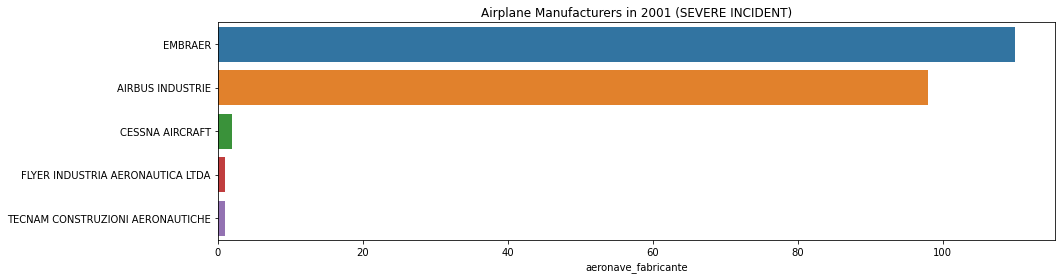

In [47]:
# in 2001 - serious incident
fabricante_2001 = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df_all_onlyrecomendation.aeronave_ano_fabricacao == 2001]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2001 = fabricante_2001[fabricante_2001.aeronave_fabricante >0]
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2001.aeronave_fabricante, y = fabricante_2001.index.astype('object'));
plt.title("Airplane Manufacturers in 2001 (SEVERE INCIDENT)");


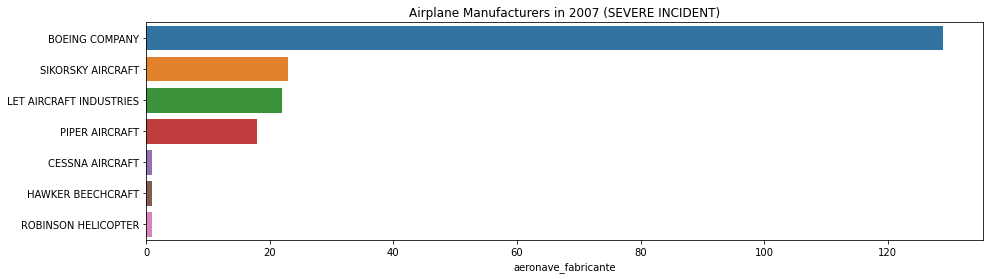

In [48]:
# in 2007 - serious incident
fabricante_2007 = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df_all_onlyrecomendation.aeronave_ano_fabricacao == 2007]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2007 = fabricante_2007[fabricante_2007.aeronave_fabricante >0]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2007.aeronave_fabricante, y = fabricante_2007.index.astype('object') );
plt.title("Airplane Manufacturers in 2007 (SEVERE INCIDENT)");

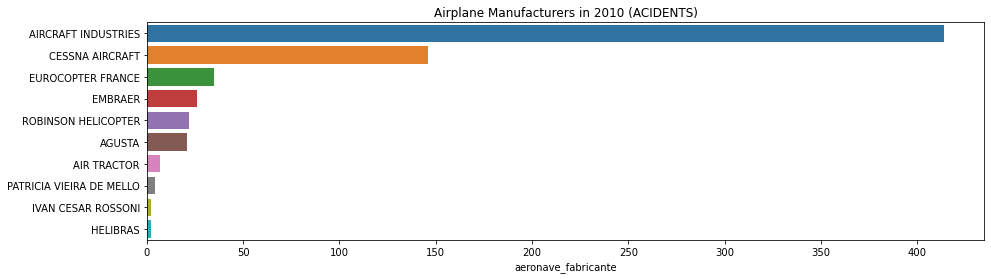

In [49]:
# in 2010 - acident
fabricante_2010 = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ( 'ACIDENTE')][df_all_onlyrecomendation.aeronave_ano_fabricacao == 2010]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2010 = fabricante_2010.sort_values('aeronave_fabricante', ascending = False).iloc[:10]
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2010.aeronave_fabricante, y = fabricante_2010.index.astype('object'));
plt.title("Airplane Manufacturers in 2010 (ACIDENTS)");

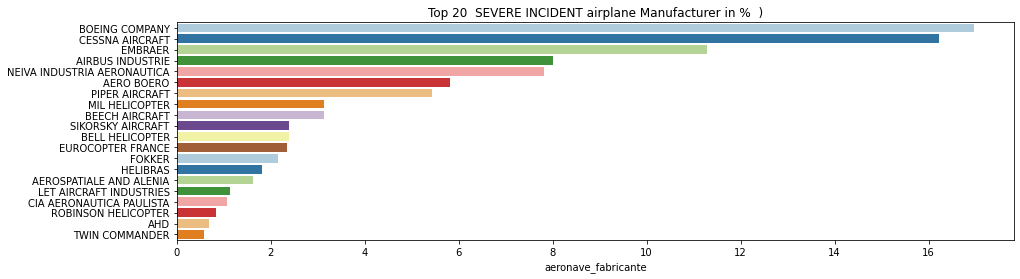

In [50]:
aux = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ('INCIDENTE GRAVE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette= "Paired" );
plt.title("Top 20  SEVERE INCIDENT airplane Manufacturer in %  )");

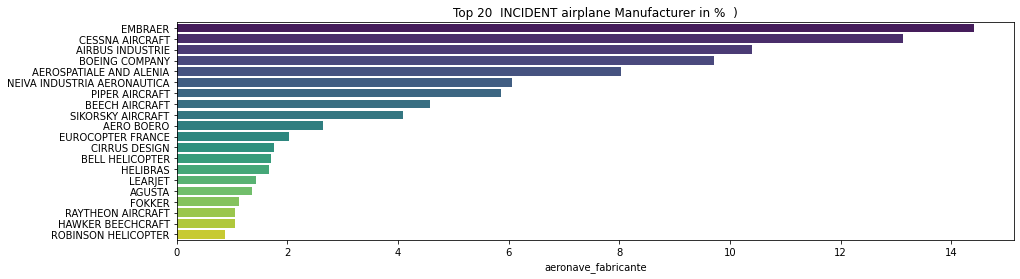

In [51]:
aux = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ('INCIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette= "viridis" );
plt.title("Top 20  INCIDENT airplane Manufacturer in %  )");

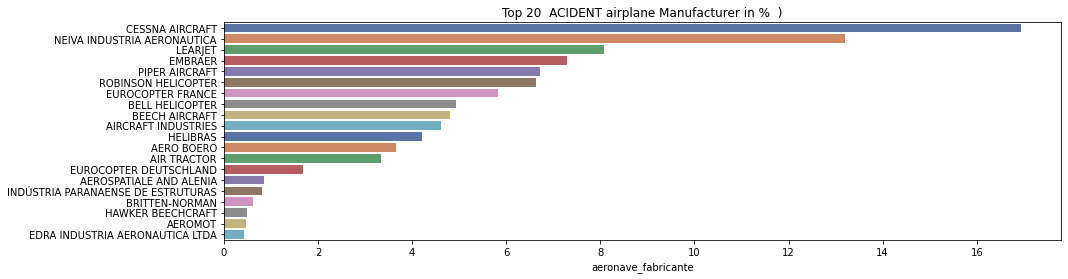

In [52]:
aux = df_all_onlyrecomendation[df_all_onlyrecomendation.ocorrencia_classificacao == ('ACIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette="deep"  );
plt.title("Top 20  ACIDENT airplane Manufacturer in %  )");

#### By City and state

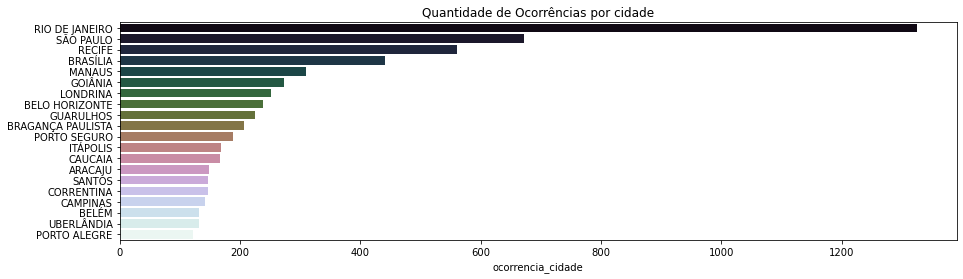

In [53]:
fig = plt.subplots(figsize = (15,4))
city_total = df_all_onlyrecomendation.ocorrencia_cidade.value_counts().to_frame()
city_total = city_total.sort_values('ocorrencia_cidade', ascending = False).iloc[:20]

sns.barplot(x= city_total.ocorrencia_cidade, y = city_total.index.astype('object') ,palette="cubehelix");
plt.title("Quantidade de Ocorrências por cidade");

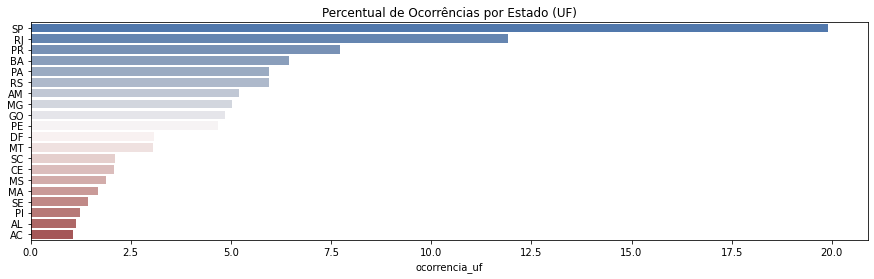

In [54]:
fig = plt.subplots(figsize = (15,4))
uf_total = df_all_onlyrecomendation.ocorrencia_uf.value_counts(normalize= True).to_frame()
uf_total = uf_total.sort_values('ocorrencia_uf', ascending = False).iloc[:20]

sns.barplot(x= uf_total.ocorrencia_uf*100, y = uf_total.index.astype('object') ,palette="vlag");
plt.title("Percentual de Ocorrências por Estado (UF)");

#### By Classification X published report

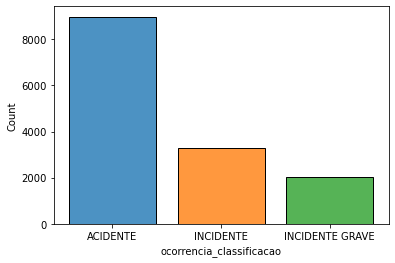

In [55]:

sns.histplot(data=df_all_onlyrecomendation, x="ocorrencia_classificacao", hue="ocorrencia_classificacao", shrink=.8, alpha=.8, legend=False);

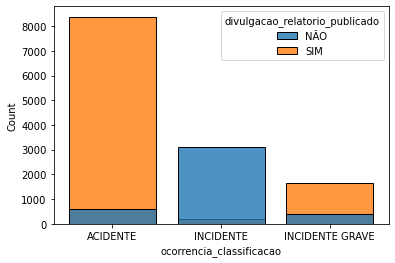

In [56]:
# ocorrencia X relatório
sns.histplot(data=df_all_onlyrecomendation, x="ocorrencia_classificacao", hue="divulgacao_relatorio_publicado", shrink=.8, alpha=.8, legend=True);

In [57]:
# relação divulgacao_relatorio_publicado X gravidade 
df_all_onlyrecomendation.divulgacao_relatorio_publicado == 'NÃO'
df_all_onlyrecomendation.groupby(['divulgacao_relatorio_publicado',  'ocorrencia_classificacao'])[  'ocorrencia_classificacao'].agg([ 'count'])

count
divulgacao_relatorio_publicado ocorrencia_classificacao       
NÃO                            ACIDENTE                    592
                               INCIDENTE                  3102
                               INCIDENTE GRAVE             396
SIM                            ACIDENTE                   8374
                               INCIDENTE                   195
                               INCIDENTE GRAVE            1650

In [58]:
pd.crosstab(index = [ df_all_onlyrecomendation.divulgacao_relatorio_publicado], columns= [df2.ocorrencia_classificacao], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

#### Aicraft type 

In [59]:
# %  fatalidades em acidentes, incidentes e incidente grave por tipo 
pd.crosstab(index= [df_all_onlyrecomendation.aeronave_tipo_veiculo], columns=[df_all_onlyrecomendation['ocorrencia_classificacao'], df_all_onlyrecomendation.aeronave_fatalidades_total], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

- Aviões tem mais ocorrências, seguido de helicópteros, inclusive em nr de fatalidades,
com exceção quanto o nr de fatalidade =8 que o helicoptero lidera
Teria relação com peso? 

#### Number of Aircrafts involved

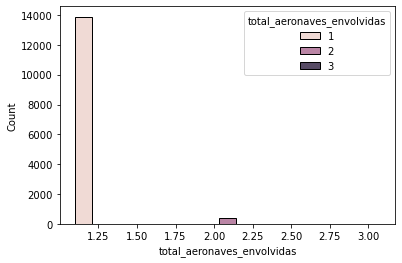

In [60]:
sns.histplot(data= df_all_onlyrecomendation, x= df_all_onlyrecomendation.total_aeronaves_envolvidas, hue= df_all_onlyrecomendation.total_aeronaves_envolvidas, shrink=.8, alpha=.8, legend=True );

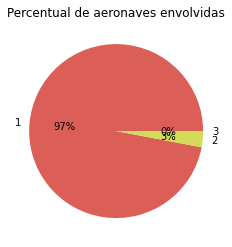

In [61]:
perc_nr_aircraft =df_all_onlyrecomendation.total_aeronaves_envolvidas.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(perc_nr_aircraft.total_aeronaves_envolvidas,labels = perc_nr_aircraft.index,colors = colors,  autopct='%.0f%%');
plt.title("Percentual de aeronaves envolvidas");

#### by Type and Category

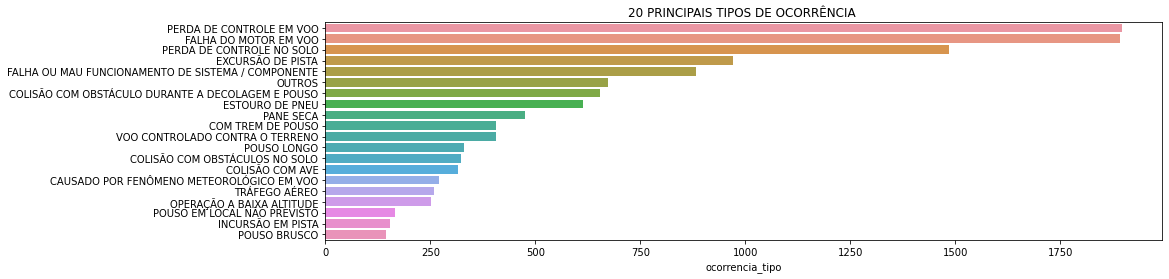

In [62]:
aux_tipo = df_all_onlyrecomendation.ocorrencia_tipo.value_counts()[:20].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo.ocorrencia_tipo, y = aux_tipo.index.astype('object') );
plt.title("20 PRINCIPAIS TIPOS DE OCORRÊNCIA ");

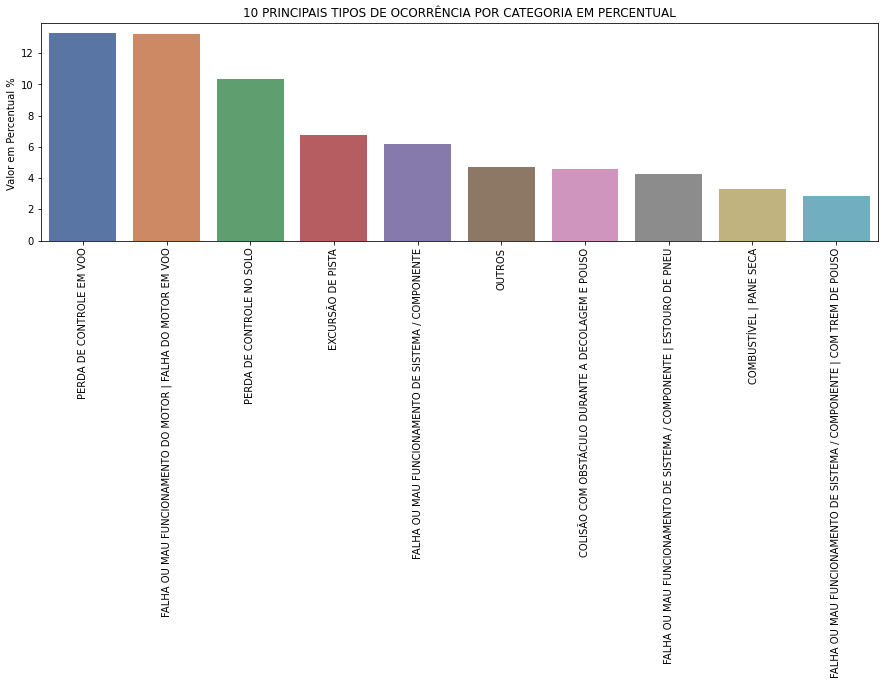

In [63]:
aux_tipo_categoria = df_all_onlyrecomendation.ocorrencia_tipo_categoria.value_counts(normalize= True)[:10].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo_categoria.index.astype('object') , y = aux_tipo_categoria.ocorrencia_tipo_categoria*100,palette="deep" );
plt.ylabel("Valor em Percentual % ");
plt.title("10 PRINCIPAIS TIPOS DE OCORRÊNCIA POR CATEGORIA EM PERCENTUAL");
plt.xticks(rotation=90);

In [64]:
# Os 6 primeiros já Representam 54% dos tipos por categoria
df_all_onlyrecomendation.ocorrencia_tipo_categoria.value_counts(normalize= True).iloc[:6].sum()

0.5451813543923405

#### Taxonomia_tipo_icao

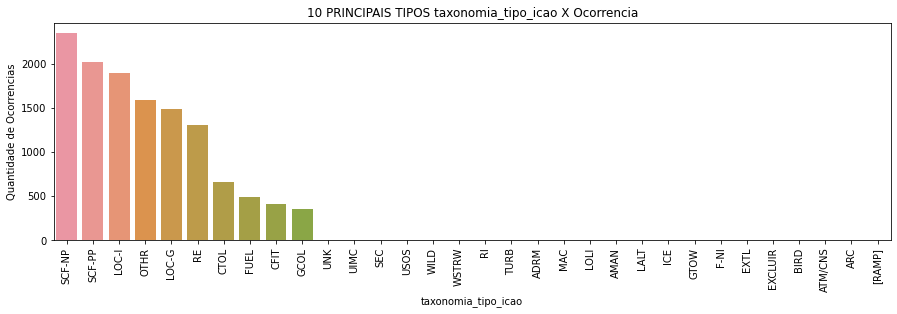

In [66]:
# Taxonomia_tipo_icao X classificação_ocorrencia
names_taxonomia = df_all_onlyrecomendation.taxonomia_tipo_icao.value_counts(normalize= True)[:10].index.astype('object')
aux_ta= df_all_onlyrecomendation.loc[df_all_onlyrecomendation.taxonomia_tipo_icao.isin(names_taxonomia), :]
group_taxonomia =aux_ta.groupby(['taxonomia_tipo_icao'] )['ocorrencia_classificacao'].count().sort_values(ascending=False).to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= group_taxonomia.index.astype('object') , y = group_taxonomia.ocorrencia_classificacao );
plt.ylabel("Quantidade de Ocorrencias");
plt.title("10 PRINCIPAIS TIPOS taxonomia_tipo_icao X Ocorrencia");
plt.xticks(rotation=90);

####  By aircraft type X nivel de Dano


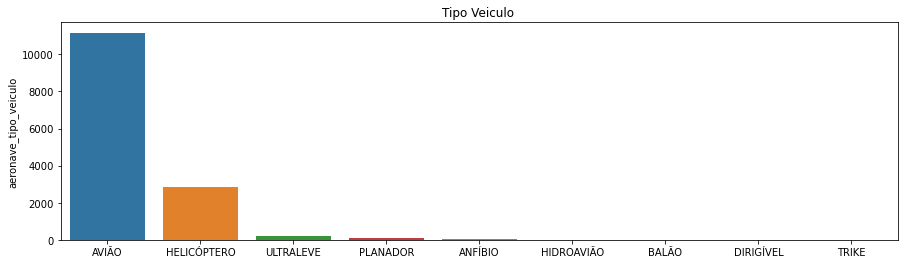

In [67]:
data = df_all_onlyrecomendation.aeronave_tipo_veiculo.value_counts().to_frame()
bar_plot_quantity_value_counts(data, 'aeronave_tipo_veiculo' , 'Tipo Veiculo ')

In [68]:
# In Percentage
df_all_onlyrecomendation.aeronave_tipo_veiculo.value_counts(normalize = True)

AVIÃO          0.780628
HELICÓPTERO    0.197778
ULTRALEVE      0.012999
PLANADOR       0.006360
ANFÍBIO        0.002166
HIDROAVIÃO     0.000070
BALÃO          0.000000
DIRIGÍVEL      0.000000
TRIKE          0.000000
Name: aeronave_tipo_veiculo, dtype: float64

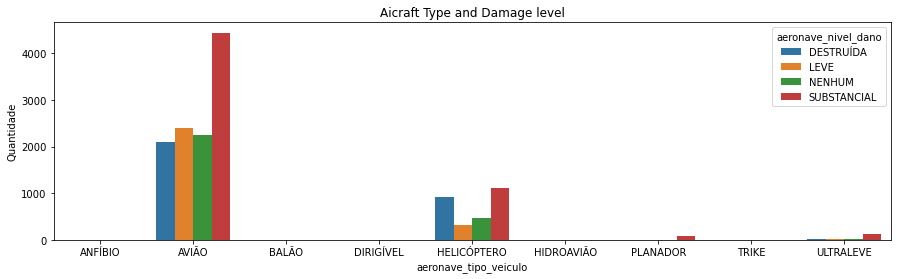

In [70]:
sub_type = df_all_onlyrecomendation[df_all_onlyrecomendation.aeronave_tipo_veiculo.astype('object').isin(['AVIÃO','HELICÓPTERO', 'ULTRALEVE','PLANADOR'])]
aux = sub_type.groupby(['aeronave_tipo_veiculo','aeronave_nivel_dano' ])['aeronave_tipo_veiculo'].agg( Quantidade=('count')).reset_index()

fig = plt.subplots(figsize = (15,4))

sns.barplot(y="Quantidade", 
x="aeronave_tipo_veiculo", 
hue="aeronave_nivel_dano", 
data=aux);

plt.title('Aicraft Type and Damage level');

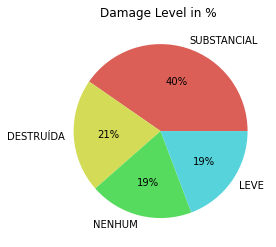

In [71]:
nivel_damage = df_all_onlyrecomendation.aeronave_nivel_dano.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(nivel_damage.aeronave_nivel_dano,labels = nivel_damage.index,colors = colors,  autopct='%.0f%%');
plt.title("Damage Level in % ");

#### Engine type and quantity

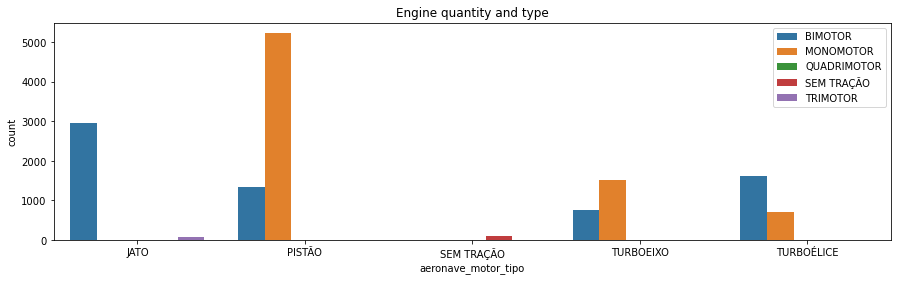

In [73]:

fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_motor_tipo', hue='aeronave_motor_quantidade', data = df_all_onlyrecomendation  );
plt.legend(loc='upper right');
plt.title('Engine quantity and type');
            

#### Aircraft Register - Category and Segmentation

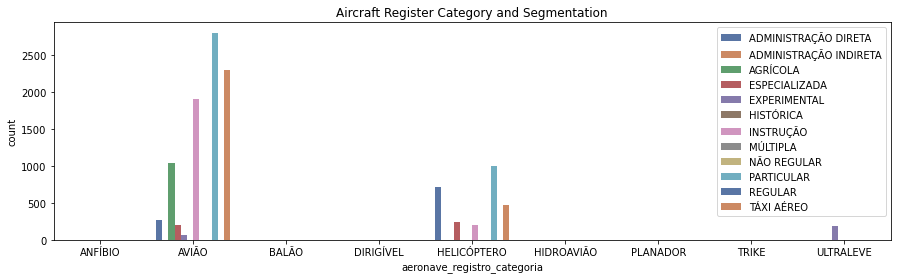

In [80]:
sub_category = df_all_onlyrecomendation[df_all_onlyrecomendation['aeronave_registro_categoria'].astype('object').isin(['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE'])][df_all_onlyrecomendation['aeronave_registro_segmento'].astype('object').isin(['PARTICULAR', 'TÁXI AÉREO', 'REGULAR ','INSTRUÇÃO','AGRÍCOLA','ADMINISTRAÇÃO DIRETA' ,'EXPERIMENTAL','ESPECIALIZADA'])]
fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_registro_categoria', hue='aeronave_registro_segmento', data = sub_category , palette= 'deep');
plt.legend(loc='upper right');
plt.title('Aircraft Register Category and Segmentation');

#### Operation Type

In [84]:
sub_category.groupby(['aeronave_registro_categoria', 'aeronave_tipo_operacao'])['aeronave_tipo_operacao'].agg(Quantity = 'count').sort_values('Quantity', ascending = False)[:20]

Quantity
aeronave_registro_categoria aeronave_tipo_operacao          
AVIÃO                       PRIVADA                     2708
                            TÁXI AÉREO                  2266
                            INSTRUÇÃO                   1854
                            AGRÍCOLA                    1301
HELICÓPTERO                 PRIVADA                     1009
                            POLICIAL                     714
                            TÁXI AÉREO                   464
                            ESPECIALIZADA                237
                            INSTRUÇÃO                    200
AVIÃO                       POLICIAL                     187
                            ESPECIALIZADA                121
ULTRALEVE                   PRIVADA                      101
AVIÃO                       NÃO REGULAR                   99
ULTRALEVE                   EXPERIMENTAL                  85
AVIÃO                       EXPERIMENTAL                  48
HELICÓPTERO                 AGRÍCOLA                      16
                            NÃO REGULAR                    6
AVIÃO                       REGULAR                        3
HELICÓPTERO                 REGULAR                        1
                            EXPERIMENTAL                   1

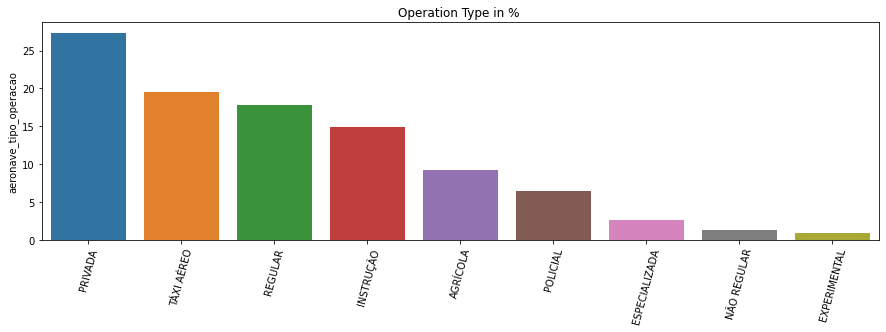

In [85]:
operation_type = (df_all_onlyrecomendation.aeronave_tipo_operacao.value_counts(normalize= True)*100).to_frame()
bar_plot_quantity_value_counts(operation_type, 'aeronave_tipo_operacao' , 'Operation Type in % ')
plt.xticks(rotation=75);

#### Flight Origin and Destination

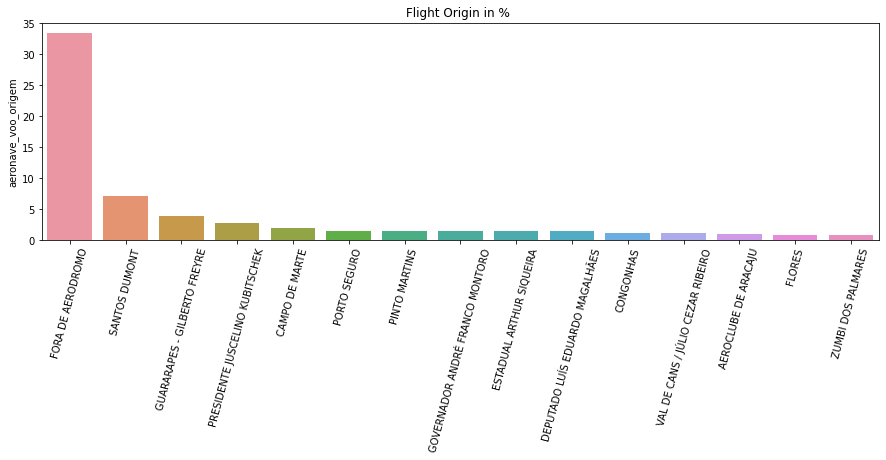

In [86]:
data = (df_all_onlyrecomendation.aeronave_voo_origem.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_origem' , 'Flight Origin in % ')
plt.xticks(rotation=75);

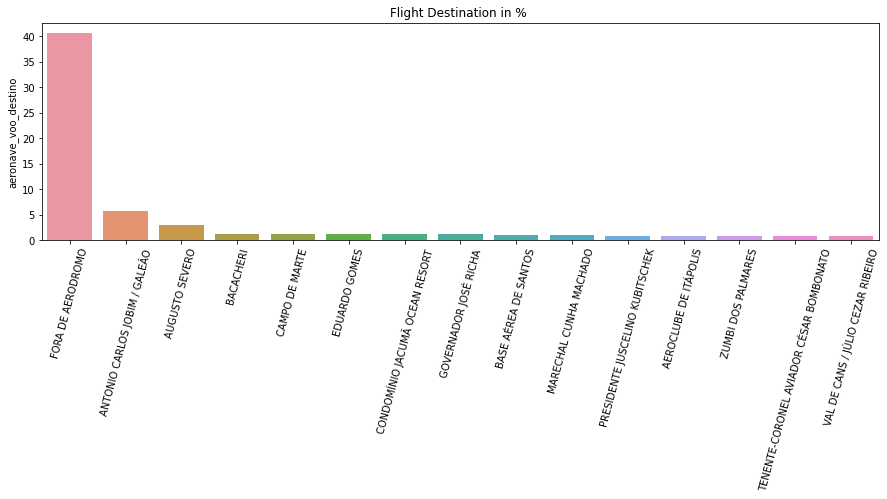

In [87]:
data = (df_all_onlyrecomendation.aeronave_voo_destino.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_destino' , 'Flight Destination in % ')
plt.xticks(rotation=75);

#### Flight operation phase

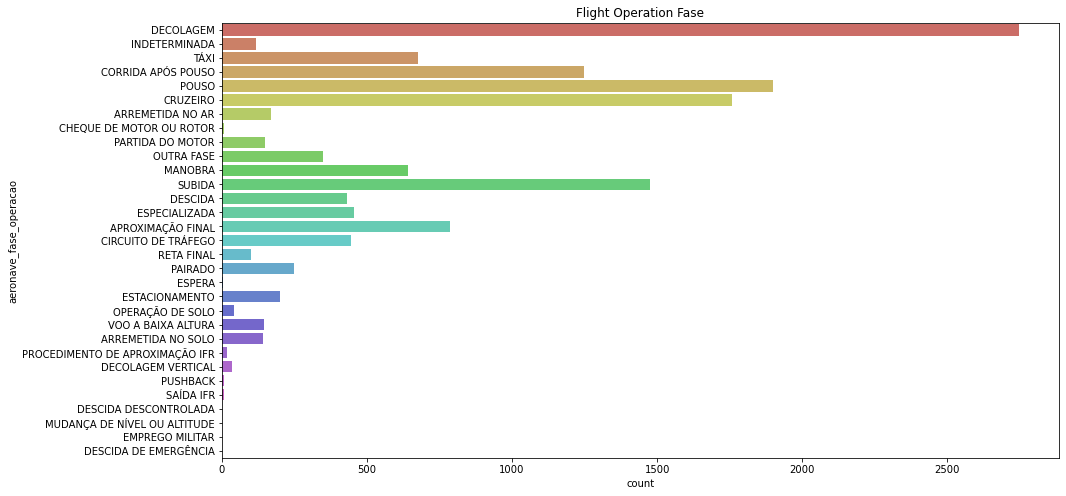

In [94]:
fig = plt.subplots(figsize = (15,8))
sub_fase = df_all_onlyrecomendation.copy()
sub_fase['aeronave_fase_operacao'] = sub_fase['aeronave_fase_operacao'].astype('object')
sns.countplot( y= 'aeronave_fase_operacao',  data = sub_fase  , palette= 'hls');
plt.title('Flight Operation Fase');


#### Fator_aspecto

Incidente não tem relatório por isso tantos na´s ?

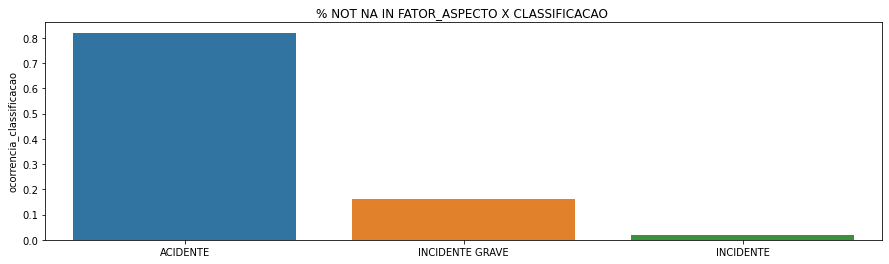

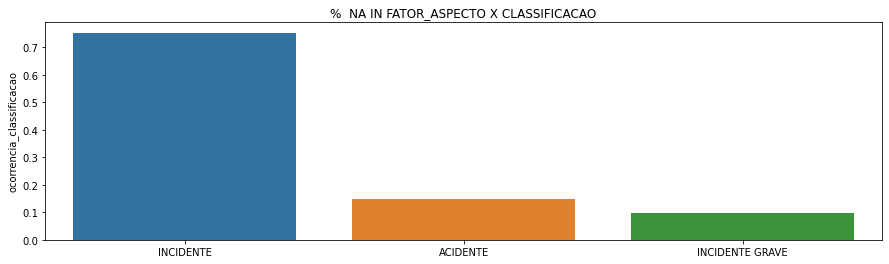

In [124]:
f_aspecto_notna = df5[df5.fator_aspecto.notna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()
f_aspecto_isna = df5[df5.fator_aspecto.isna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()

bar_plot_quantity_value_counts(f_aspecto_notna, 'ocorrencia_classificacao' , '% NOT NA IN FATOR_ASPECTO X CLASSIFICACAO ')
bar_plot_quantity_value_counts(f_aspecto_isna, 'ocorrencia_classificacao' , '%  NA IN FATOR_ASPECTO X CLASSIFICACAO')


In [305]:

pd.pivot_table(df_reports, values=['ocorrencia_cidade'], index= ['fator_aspecto'], columns=['ocorrencia_classificacao'], aggfunc='count')

ocorrencia_cidade            \
ocorrencia_classificacao                                ACIDENTE INCIDENTE   
fator_aspecto                                                                
ASPECTO DE FABRICAÇÃO                                         50         3   
ASPECTO DE MANUSEIO DO MATERIAL                                0         0   
ASPECTO DE PROJETO                                            33         2   
ASPECTO MÉDICO                                               160         0   
ASPECTO PSICOLÓGICO                                         3389        26   
DESEMPENHO DO SER HUMANO                                    4026        98   
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL               184         8   
ERGONOMIA                                                     14         0   
INFRAESTRUTURA AEROPORTUÁRIA                                 103        18   
INFRAESTRUTURA DE TRÁFEGO AÉREO                                8         8   
OUTRO                                                        123         0   

                                                                
ocorrencia_classificacao                       INCIDENTE GRAVE  
fator_aspecto                                                   
ASPECTO DE FABRICAÇÃO                                       10  
ASPECTO DE MANUSEIO DO MATERIAL                              4  
ASPECTO DE PROJETO                                          17  
ASPECTO MÉDICO                                              34  
ASPECTO PSICOLÓGICO                                        504  
DESEMPENHO DO SER HUMANO                                   760  
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL              43  
ERGONOMIA                                                    9  
INFRAESTRUTURA AEROPORTUÁRIA                                49  
INFRAESTRUTURA DE TRÁFEGO AÉREO                              9  
OUTRO                                                       40

#### Fator aspecto X fator_condicionante X fator área

Falta de treinamento?

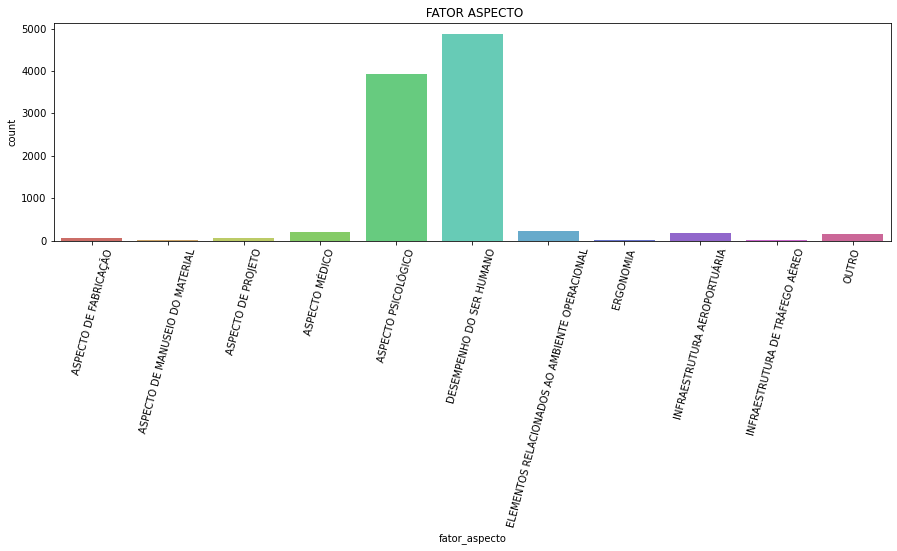

In [306]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', data= df_reports, palette= "hls");
plt.title(' FATOR ASPECTO')
plt.xticks(rotation=75);

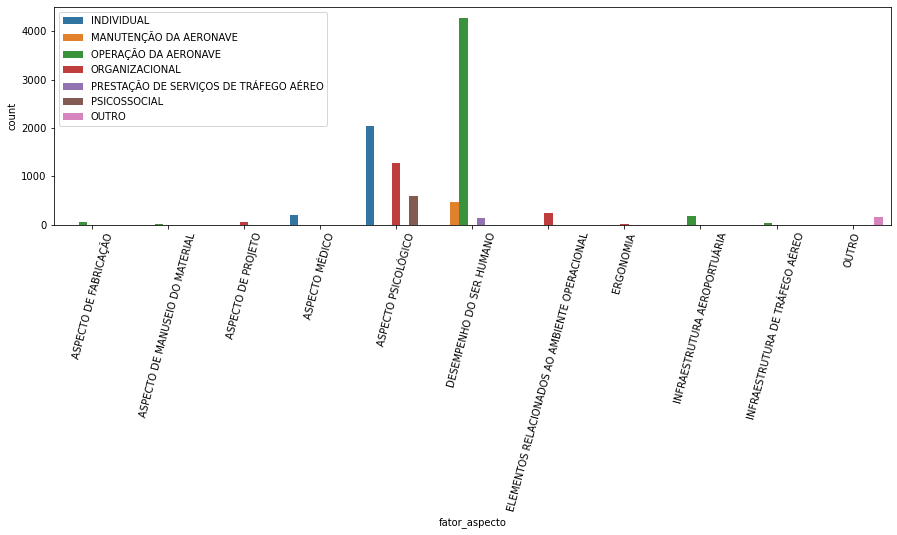

In [307]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', hue='fator_condicionante', data= df_reports);
plt.legend('  FATOR ASPECTO X FATOR CONDICIONANTE')
plt.xticks(rotation=75);
plt.legend(loc= 'upper left');


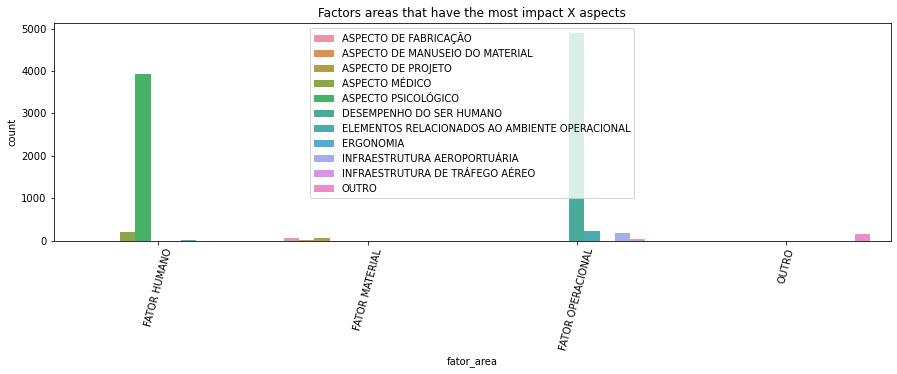

In [308]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_area', hue='fator_aspecto', data= df_reports);
plt.xticks(rotation=75);
plt.title('Factors areas that have the most impact X aspects');
plt.legend(loc= 'upper center');

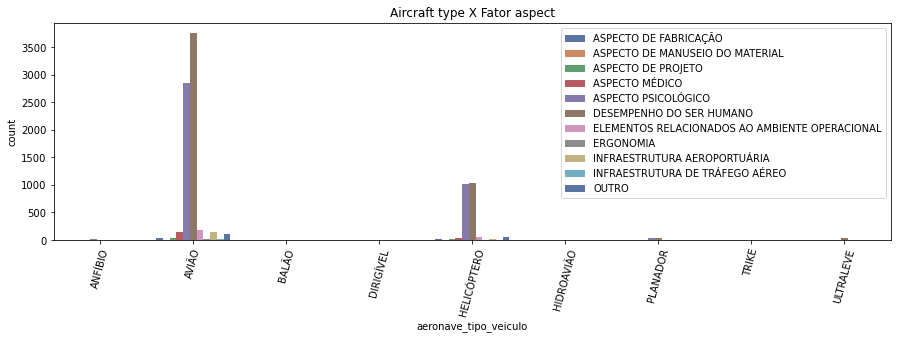

In [309]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='fator_aspecto', data= df_reports, palette= 'deep');
plt.xticks(rotation=75);
plt.title('Aircraft type X Fator aspect');
plt.legend(loc= 'upper right');

#### recomendation content

In [112]:
sub_recomend = df_all_onlyrecomendation[df_all_onlyrecomendation.recomendacao_conteudo != 'NA - relatório Não publicado']
sub_recomend.groupby('recomendacao_conteudo')['recomendacao_conteudo'].agg(frequencia_nr='count').sort_values('frequencia_nr', ascending = False)[:30]

frequencia_nr
recomendacao_conteudo                                            
Realizar o treinamento de emergências durante o...             72
"Realizar o treinamento inicial e recorrente de...             72
Reavaliar a aceitação do conteúdo do MGO da Oce...             38
Rever as autorizações contidas nas Especificaçõ...             38
Enriquecer o conteúdo do treinamento com proced...             38
Estabelecer e manter um sistema continuado de a...             38
Estabelecer e prover meios para o acompanhament...             38
Avaliar o conteúdo do treinamento ministrado ao...             38
Avaliar possíveis lacunas instrucionais que pos...             38
Proceder à revisão das atribuições do responsáv...             38
Realizar auditoria especial na empresa Lanceair...             38
Realizar auditoria especial na empresa Target A...             38
Adotar procedimentos com a finalidade de reduzi...             38
Supervisionar a empresa Oceanair Táxi-Aéreo Ltd...             38
Realizar estudo visando a uma possível inclusão...             38
Definir perfis para contratação de pilotos comp...             38
Reforçar o treinamento de CRM e a padronização ...             38
Reavaliar a aceitação do conteúdo do MGO da Oce...             38
Desenvolver o Manual de Procedimentos Especiais...             38
Desenvolver Listas de Equipamentos Mínimos (MEL...             38
Adotar medidas para assegurar que o pessoal que...             38
Divulgar, junto aos seus associados, os ensinam...             36
Divulgar o conteúdo do presente relatório duran...             35
Atuar junto à EJ Escola de Aeronáutica Ltda. ME...             32
Divulgar os ensinamentos deste relatório em sua...             28
Divulgar o conteúdo do presente relatório duran...             28
Atuar junto à LATAM AIRLINES GROUP S.A., a fim ...             26
Atuar junto à LATAM AIRLINES GROUP S.A., a fim ...             26
Atuar junto ao pessoal dos Serviços de Tráfego ...             26
Divulgar o conteúdo do presente relatório aos o...             22

#### recomendacao_destinatario_sigla

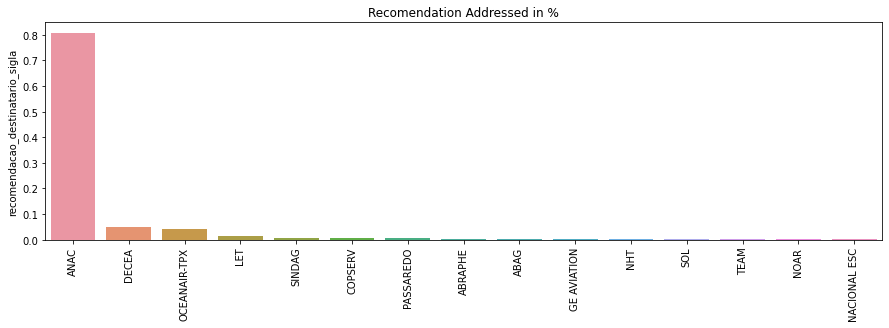

In [310]:
recomendation_address = df_reports.recomendacao_destinatario_sigla.value_counts(normalize= True).to_frame()[0:15]

bar_plot_quantity_value_counts(recomendation_address, 'recomendacao_destinatario_sigla' , 'Recomendation Addressed in %')
plt.xticks(rotation = 90);



#### recomendation_status

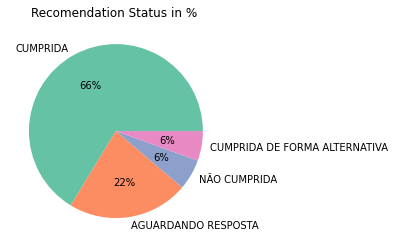

In [311]:
recomendation_status = df_reports.recomendacao_status.value_counts(normalize= True).to_frame()
colors = sns.color_palette('Set2')
plt.pie(recomendation_status.recomendacao_status,labels = recomendation_status.index,colors = colors,  autopct='%.0f%%');
plt.title("Recomendation Status in % ");

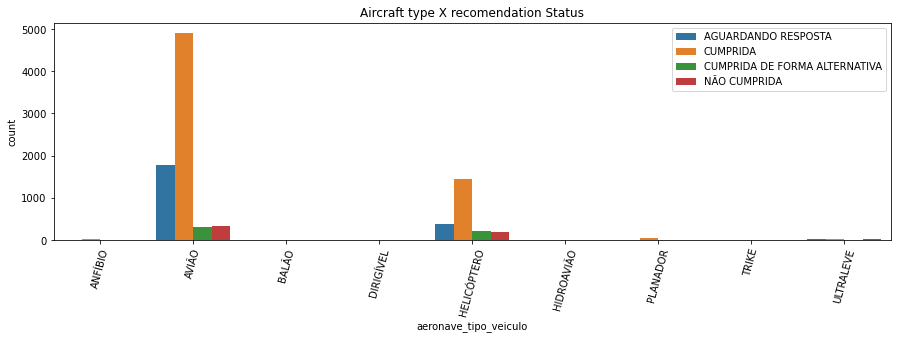

In [312]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='recomendacao_status', data= df_reports );
plt.xticks(rotation=75);
plt.title('Aircraft type X recomendation Status');
plt.legend(loc= 'upper right');

#### map (lat, long)

In [313]:
map_localization(df_report_geo)

#### Month, Day , Day of week, week of year

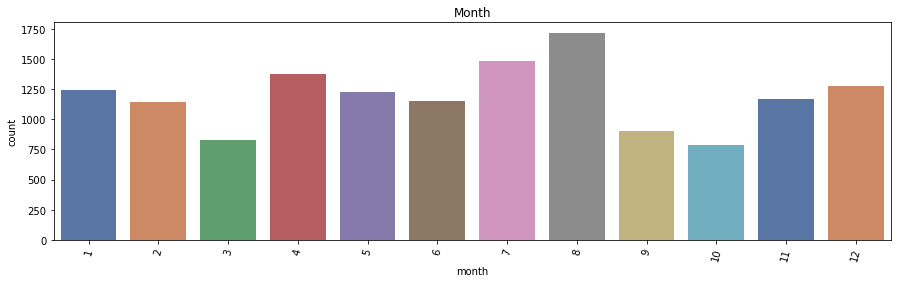

In [316]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'month', data= df_all_onlyrecomendation, palette= 'deep');
plt.xticks(rotation=75);
plt.title('Month');


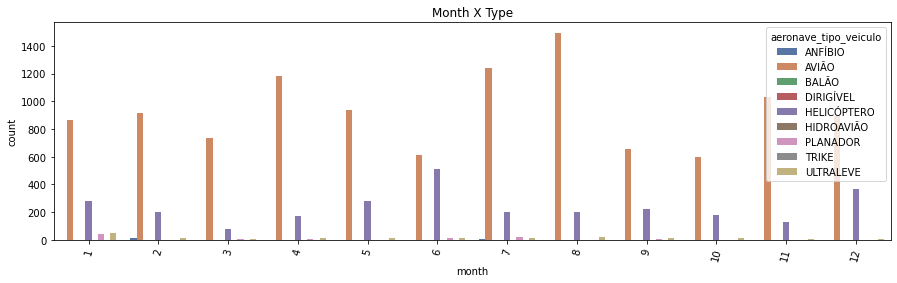

In [322]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'month', hue= 'aeronave_tipo_veiculo' ,data= df_all_onlyrecomendation, palette= 'deep');
plt.xticks(rotation=75);
plt.title('Month X Type');

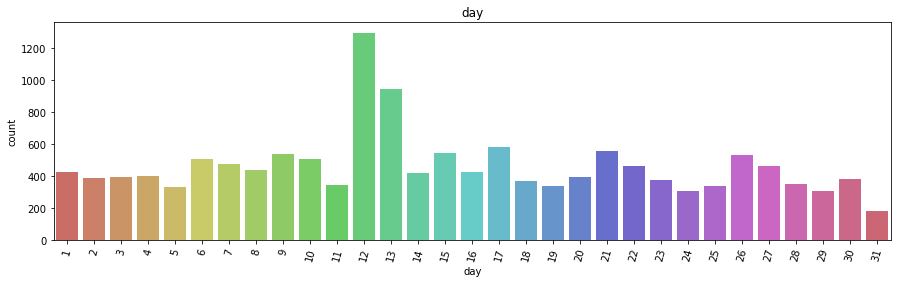

In [318]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'day', data= df_all_onlyrecomendation, palette= 'hls');
plt.xticks(rotation=75);
plt.title('day');

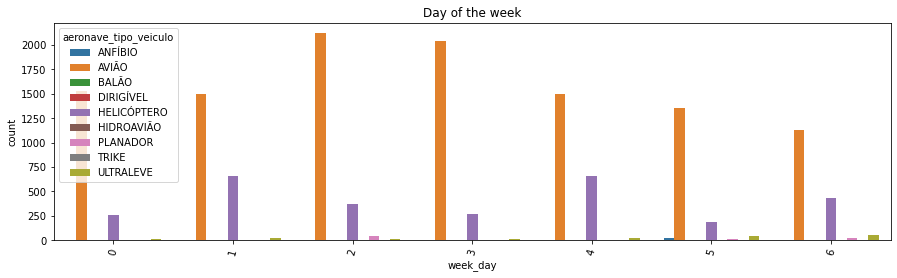

In [328]:
#0  monday  6 sunday
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'week_day', hue= 'aeronave_tipo_veiculo' ,data= df_all_onlyrecomendation);
plt.xticks(rotation=75);
plt.title('Day of the week');

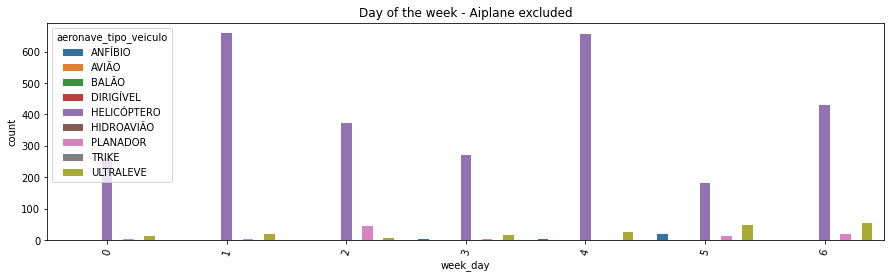

In [331]:
fig = plt.subplots(figsize = (15,4))

sub_week_day = df_all_onlyrecomendation[df_all_onlyrecomendation.aeronave_tipo_veiculo != 'AVIÃO']
sns.countplot(x= 'week_day', hue= 'aeronave_tipo_veiculo' ,data= sub_week_day );
plt.xticks(rotation=75);
plt.title('Day of the week - Aiplane excluded');


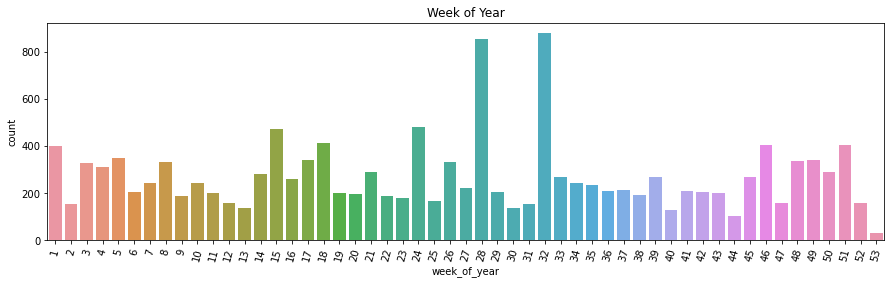

In [320]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'week_of_year', data= df_all_onlyrecomendation);
plt.xticks(rotation=75);
plt.title('Week of Year');

#### waiting_days to publish the report

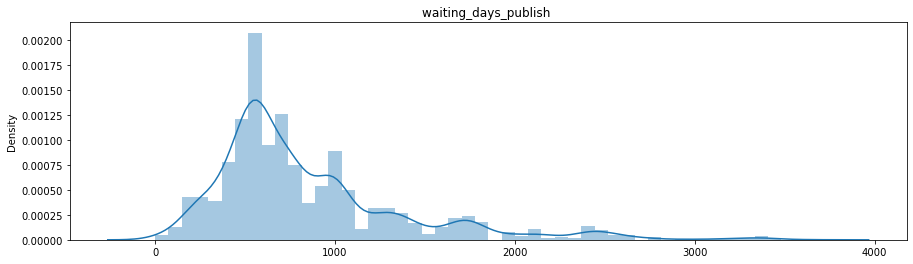

In [336]:
fig = plt.subplots(figsize = (15,4))

sns.distplot(x= df_reports.waiting_days_publish, );

plt.title('waiting_days_publish ');


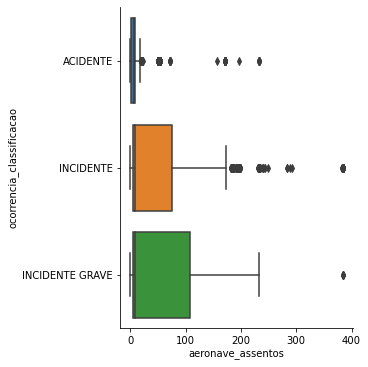

In [338]:
sns.catplot(data=df_all_onlyrecomendation, x="aeronave_assentos", y="ocorrencia_classificacao", kind="box");

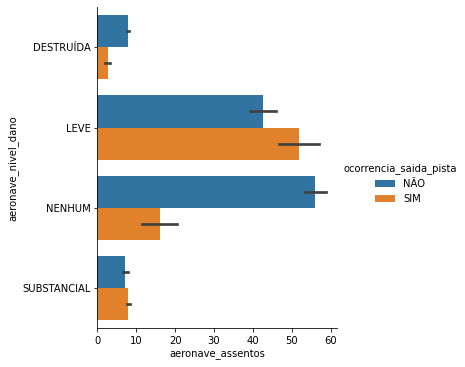

In [339]:
#ocorrencia_classificacao 
sns.catplot(data=df_all_onlyrecomendation, x="aeronave_assentos", y="aeronave_nivel_dano", hue="ocorrencia_saida_pista", kind="bar");

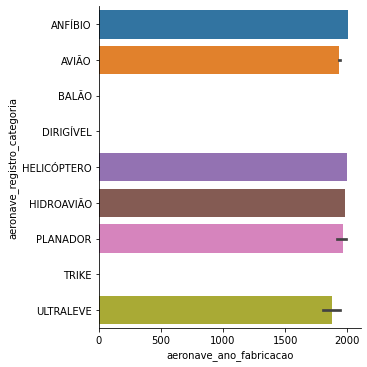

In [340]:
sns.catplot(data=df_all_onlyrecomendation, y="aeronave_registro_categoria", x="aeronave_ano_fabricacao" , kind="bar");


## 4.2. Analise das Hipóteses

### H.1 - No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? 
***VERDADEIRO** Sim, to total 18.63% referem-se a decolagem e somente 13,03% no Pouso 

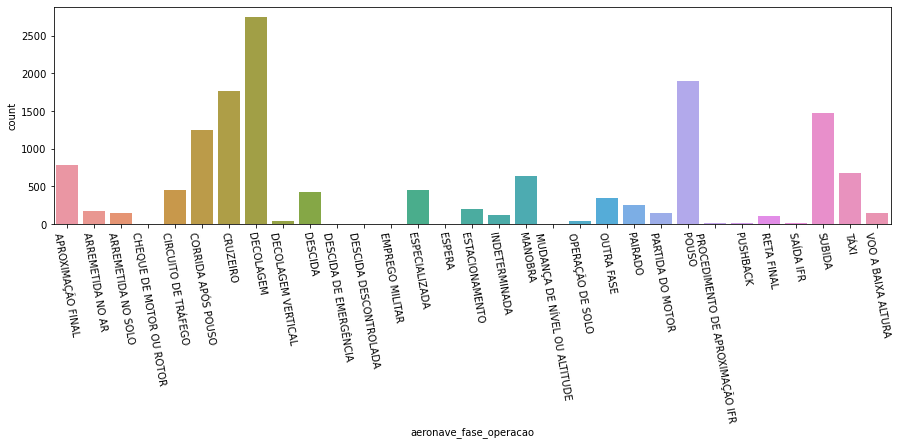

In [342]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_fase_operacao', data = df_all_onlyrecomendation)
plt.xticks(rotation=-80);

In [343]:
df_all_onlyrecomendation.aeronave_fase_operacao.value_counts()

DECOLAGEM                          2747
POUSO                              1898
CRUZEIRO                           1758
SUBIDA                             1475
CORRIDA APÓS POUSO                 1248
APROXIMAÇÃO FINAL                   785
TÁXI                                675
MANOBRA                             643
ESPECIALIZADA                       454
CIRCUITO DE TRÁFEGO                 446
DESCIDA                             430
OUTRA FASE                          347
PAIRADO                             250
ESTACIONAMENTO                      200
ARREMETIDA NO AR                    169
PARTIDA DO MOTOR                    150
VOO A BAIXA ALTURA                  146
ARREMETIDA NO SOLO                  143
INDETERMINADA                       118
RETA FINAL                          102
OPERAÇÃO DE SOLO                     42
DECOLAGEM VERTICAL                   35
PROCEDIMENTO DE APROXIMAÇÃO IFR      18
PUSHBACK                              7
SAÍDA IFR                             7


### H.2 No Sudeste tem menos acidente que no resto do país?
***FALSO*** No sudeste são concentrados aprox. 37% das ocorrências, apesar de SP e RJ terem um maior número de casos.

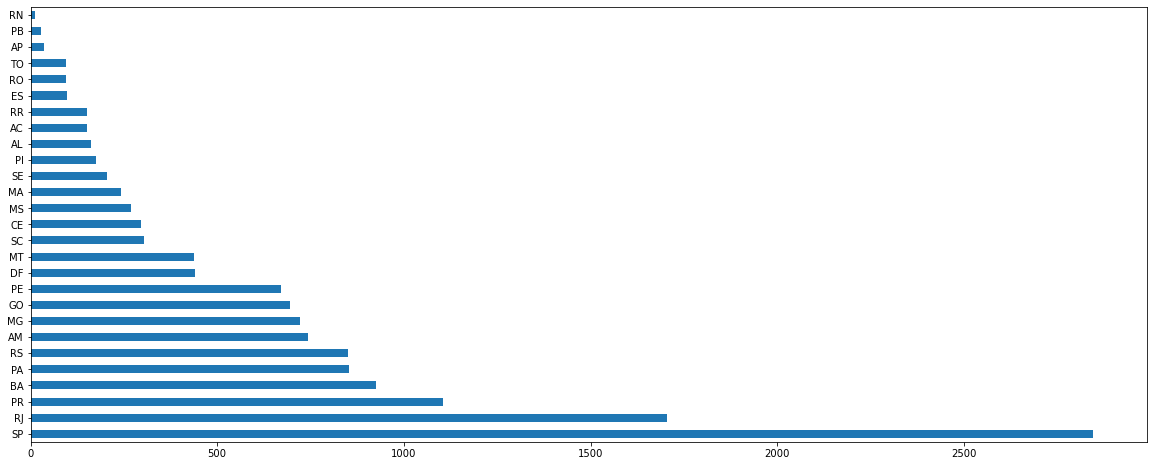

In [344]:
fig = plt.subplots(figsize = (20,8))
df_all_onlyrecomendation.ocorrencia_uf.value_counts().plot.barh();

In [345]:
df_all_onlyrecomendation.ocorrencia_uf.value_counts()

SP    2847
RJ    1706
PR    1106
BA     924
PA     852
RS     850
AM     743
MG     721
GO     694
PE     670
DF     441
MT     438
SC     303
CE     297
MS     269
MA     242
SE     204
PI     176
AL     161
AC     152
RR     150
ES      98
RO      95
TO      94
AP      35
PB      29
RN      12
Name: ocorrencia_uf, dtype: int64

In [346]:
sudeste = df_all_onlyrecomendation[(df_all_onlyrecomendation.ocorrencia_uf == 'SP') | (df_all_onlyrecomendation.ocorrencia_uf == 'RJ')  | (df_all_onlyrecomendation.ocorrencia_uf == 'ES') | (df_all_onlyrecomendation.ocorrencia_uf == 'MG')]['ocorrencia_uf'].count()
total= df_all_onlyrecomendation.ocorrencia_uf.count()
percent = sudeste/total*100
print('No sudeste acontecem {}% das ocorrencias'.format(round(percent,2) ))

No sudeste acontecem 37.54% das ocorrencias


### H.3     Em Aeronaves mais novas há menos ocorrência  se houver mais  motores ? Aviões particulares sofrem mais acidentes que o resto ?
**SIM e NÃO**  Mais novos (0 e 1 ano) a maioria refere-se aos aviões regulares, bimotores e monomotores 

In [349]:
a = df_all_onlyrecomendation[df_all_onlyrecomendation.aeronave_ano_fabricacao < 2]
px.histogram(a, x='aeronave_operador_categoria',  color="aeronave_ano_fabricacao")

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao', 'aeronave_matricula', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd', 'aeronave_pmd_categoria', 'aeronave_assentos', 'aeronave_ano_fabricacao', 'aeronave_registro_categoria', 'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'aeronave_fatalidades_total', 'recomendacao_conteudo', 'recomendacao_destinatario', 'month', 'day', 'week_of_year', 'week_day'] but received: aeronave_operador_categoria

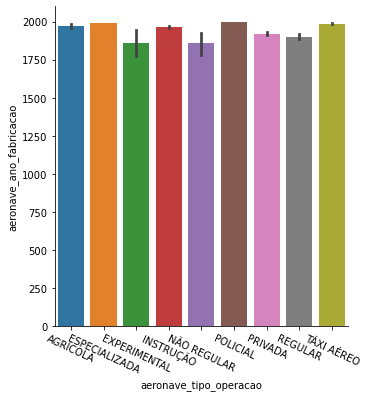

In [351]:
sns.catplot(data=df_all_onlyrecomendation, y="aeronave_ano_fabricacao", x="aeronave_tipo_operacao" , kind="bar");
plt.xticks(rotation=-25);

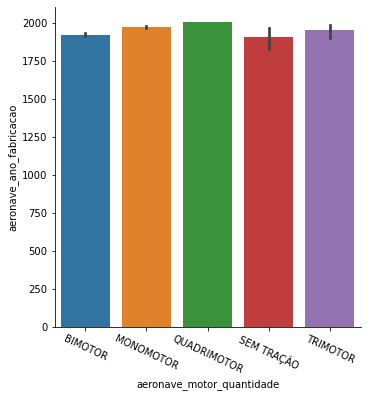

In [352]:

sns.catplot(data=df_all_onlyrecomendation, y="aeronave_ano_fabricacao", x="aeronave_motor_quantidade" , kind="bar");

#sns.catplot(data=a, x="aeronave_motor_quantidade", y="aeronave_ano_fabricacao", hue="aeronave_operador_categoria", kind="bar");
plt.xticks(rotation=-25);

### H.4 Helicopteros sofrem mais ocorrencias que aviões comuns ? Deste quais são considerados mais graves?
*** Não*** Aviões tem mais ocorrencia que helicopteros e tem um nível de dano maior

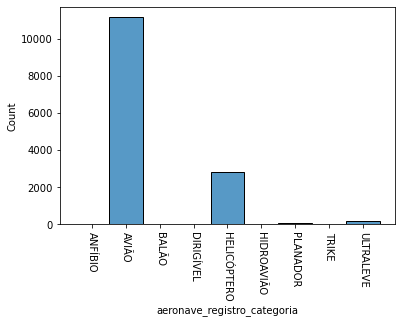

In [353]:

sns.histplot(df_all_onlyrecomendation['aeronave_registro_categoria']);
plt.xticks(rotation=-90);

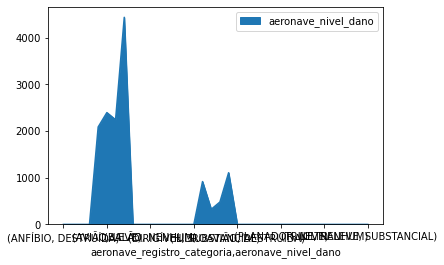

In [355]:
mask = df_all_onlyrecomendation.aeronave_registro_categoria.isin(["HELICÓPTERO", "AVIÃO" ])
a = df_all_onlyrecomendation[mask]

a[['aeronave_nivel_dano','aeronave_registro_categoria']]
df_all_onlyrecomendation[mask].groupby(['aeronave_registro_categoria',"aeronave_nivel_dano" ] ).agg({"aeronave_nivel_dano": "count"}).plot.area()  ;


# 5.0 Deploy

In [ ]:
class aviation_occurencies:
    def __init__( self ):
        self.home_path = 'G:/DADOS/Documents/CURSOS_Dev/A3Data'
        
    def data_collect(self):
        ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
        tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
        aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
        fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
        rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


        #merge
        aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
        aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
        aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
        df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )
    
        return df_raw

    

    def data_clenning(self, df1):
        #ocorrencia_dia - mudar para datetime 
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%Y-%m-%d')


        # recomendacao_dia_encaminhamento - 0 se dia for data com má formato 
        df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: 0 if ((x == '0002-11-29') or( x =='0002-11-24')or (x == '0002-11-17') or (x == '0002-11-27') or (x == '0002-11-26')) else x )
        df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


        #recomendacao_dia_feedback
        #df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply(lambda x: 0 if ((x == '0000-00-00') or (x == '0002-11-29') or (x == '0002-11-21') or (x == '0002-11-23')) else x)
        #df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

        #recomendacao_dia_assinatura
        df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')
        # convertendo os dados numéricos
        for c in df1.select_dtypes( include=['int64'] ):
            df1[c] = df1[c].astype('int32')

        #   aeronave_ano_fabricacao         
        df1['aeronave_ano_fabricacao'] = df1['aeronave_fatalidades_total'].astype('int32')
        df1['aeronave_assentos'].fillna(0, inplace=True )
        df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

        # convertendo os dados categóricos
        for c in df1.select_dtypes( include=['object'] ):
            df1[c] = df1[c].astype('category')

        #excluindo 
        df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4','divulgacao_relatorio_numero','ocorrencia_pais', 'recomendacao_numero', 'recomendacao_dia_feedback' , 'recomendacao_destinatario_sigla', 'aeronave_matricula', 'aeronave_pmd', 'aeronave_pmd_categoria'], axis=1, inplace=True)


        #correncia_latitude  como todas com na tem 'ocorrencia_cidade', colocar 0 para manter as linhas
        df1.dropna(subset =['ocorrencia_latitude'], inplace=True)


        #ocorrencia_longitude                1581
        df1.dropna(subset =['ocorrencia_longitude'], inplace=True)


        #ocorrencia_hora       drop
        df1.dropna(subset =['ocorrencia_hora'], inplace=True)

        #investigacao_aeronave_liberada - Suposições:
        ## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
        # NAO se divulgacao_relatorio_publicado == NAO 
        # os na´s que sobreram drop =647 
        df1.loc[ (df1['investigacao_aeronave_liberada'].isna()) & (df1['investigacao_status']== 'FINALIZADA') & (df1['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
        df1.loc[ ( df1['investigacao_aeronave_liberada'].isna() ) & ( df1.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
        df1.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


        #investigacao_status                    
        df1.dropna(subset =['investigacao_status'], inplace=True)


        #divulgacao_dia_publicacao           
        df1['divulgacao_dia_publicacao'] = df1['divulgacao_dia_publicacao'].cat.add_categories("0").fillna("0")

        #aeronave_voo_origem                    1
        df1.dropna(subset =['aeronave_voo_origem'], inplace=True)

        # aeronave_motor_tipo
        df1.dropna(subset =['aeronave_motor_tipo'], inplace=True)


        ## 4799  ou 28% do db como o obj. criei cat 'não informado'                         
        df1['fator_nome'] = df1['fator_nome'].cat.add_categories("não informado").fillna("não informado")                     
        df1['fator_aspecto'] = df1['fator_aspecto'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_condicionante'] = df1['fator_condicionante'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_area'] = df1['fator_area'].cat.add_categories("não informado").fillna("não informado")

        # recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
        df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

        # para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
        #recomendacao_dia_encaminhamento    5698
        # não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
        df1.loc[df1['recomendacao_dia_encaminhamento'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0
        df1['recomendacao_dia_encaminhamento'].fillna(0, inplace=True )


        # set categoria
        df1['recomendacao_conteudo'] = df1['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_conteudo'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
        # o restante vou dropar 
        df1.dropna(subset =['recomendacao_conteudo'], inplace=True)

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_status'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_status'] = "***"
        df1.dropna(subset =['recomendacao_status'], inplace=True)


        #set categoria
        df1['recomendacao_destinatario'] = df1['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
        # recomendacao_destinatario
        df1.loc[df1['recomendacao_destinatario'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

        return df1


    def filtering_data(self, df1):
        # Filtrando
        df2 = df1.loc[(df1['ocorrencia_latitude'] != "***") & (df1['ocorrencia_longitude'] != "***") & (df1.aeronave_motor_tipo != "***") & (df1.aeronave_nivel_dano != "***"), :]

        return df2


In [ ]:
if __name__ == '__main__':
    # Instancia
    aviacao = aviation_occurencies()

    #Coleta
    data_raw = aviacao.data_collect()

    #Limpa
    df1 = aviacao.data_clenning(data_raw)

    # Filtra
    df2 = aviacao.filtering_data(df1)


In [ ]:
df2.head()

In [ ]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Cols: {}'.format( df2.shape[1] ) )